# Workflow de Classificação: Diagnóstico de Câncer de Mama

**Projeto:** ADA - Projeto Machine Learning

**Objetivo:** Desenvolver um modelo de classificação para prever se um diagnóstico é Maligno ou Benigno.

In [24]:
%pip install --quiet pandas numpy matplotlib seaborn scikit-learn
%pip install --quiet xgboost
%pip install --quiet kagglehub

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier # Importando o classificador
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC # Importando o Support Vector CLASSIFIER

import warnings

# Suprime apenas FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)







In [25]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "data.csv"

# Load the latest version
dt = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "uciml/breast-cancer-wisconsin-data",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", dt.head())

Using Colab cache for faster access to the 'breast-cancer-wisconsin-data' dataset.
First 5 records:          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280    

In [26]:
print("=== Informações do DataFrame ===")
print(dt.info())

print("\n=== Colunas do DataFrame ===")
print(dt.columns.tolist())


=== Informações do DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float6

In [27]:
print("\n=== Definição do Dataframe ===")
print(dt.shape)


=== Definição do Dataframe ===
(569, 33)


In [28]:

print("\n=== Estatísticas Descritivas Transpostas ===")
dt.describe().T



=== Estatísticas Descritivas Transpostas ===


,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


Verificando valores ausentes com um mapa de calor


<Axes: >

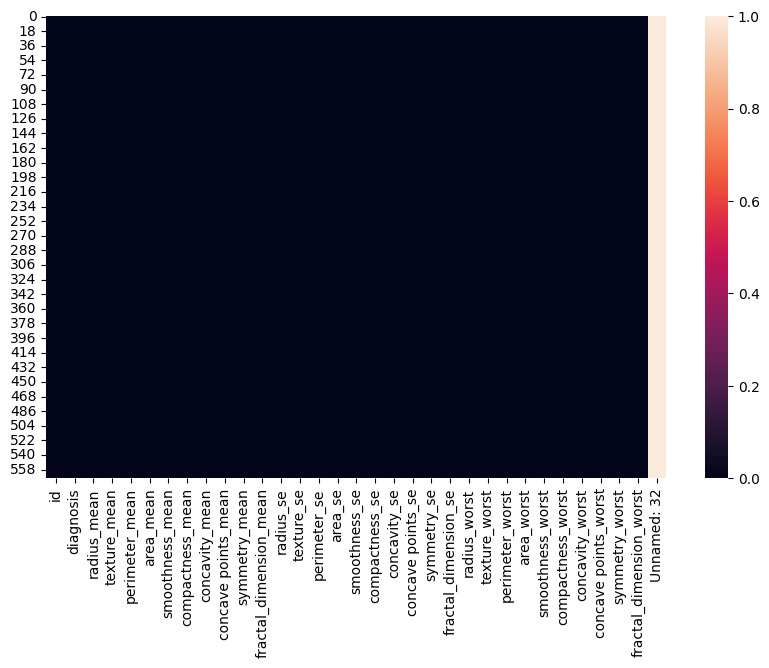

In [29]:
print("Verificando valores ausentes com um mapa de calor")
plt.figure(figsize=(10, 6))
sns.heatmap(dt.isnull())

**Revisão Preliminar do Conjunto de Dados**

O *dataset*, com 569 registros e 33 colunas, é adequado para análise exploratória e modelagem preditiva, desde que pré-processado.

**Estrutura e Qualidade dos Dados:**

* **Dimensão:** 569 registros e 33 colunas.
* **Dados Faltantes:** A coluna `Unnamed: 32` está integralmente vazia e deve ser removida. As demais 32 colunas não contêm valores nulos.
* **Colunas Irrelevantes:** A coluna `id`, um identificador único sem valor preditivo, deve ser excluída.
* **Tipos de Dados:** A variável alvo (`diagnosis`, tipo `object`) exige conversão para formato numérico (binário) para uso em algoritmos. Os demais atributos preditores (`float64` ou `int64`) estão em formato apropriado.
* **Escala das Variáveis:** A disparidade de escala entre os atributos numéricos (ex.: `area_mean` *vs.* `smoothness_mean`) pode impactar o desempenho do modelo. Padronização ou normalização é obrigatória.

**Conclusão:** O conjunto de dados apresenta boa estrutura e ausência de nulos (exceto uma coluna a ser removida). Ajustes cruciais incluem a exclusão de colunas irrelevantes (`Unnamed: 32` e `id`), a transformação da variável alvo para formato numérico e a aplicação de técnicas de escala nos atributos preditores. Tais procedimentos são essenciais para otimizar a eficácia dos modelos de *machine learning*.

### Limpeza preliminar (remover colunas `id` e `Unnamed: 32`)

In [30]:
dt = dt.drop(columns=['Unnamed: 32', 'id'])
dt.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##  Análise Exploratória de Dados (EDA)

### Analisar a distribuição da variável alvo `diagnosis`

In [31]:
counts = dt['diagnosis'].value_counts()
percentages = dt['diagnosis'].value_counts(normalize=True)*100

distribution_df = pd.DataFrame({
    'Contagem': counts,
    'Porcentagem': percentages.map('{:.2f}%'.format) # Formata a coluna de porcentagem
})
print("Distribuição das Classes:")
print(distribution_df)

Distribuição das Classes:
           Contagem Porcentagem
diagnosis                      
B               357      62.74%
M               212      37.26%


 **Análise Visual**
 Um gráfico de contagem (countplot) é a melhor forma de visualizar a distribuição.

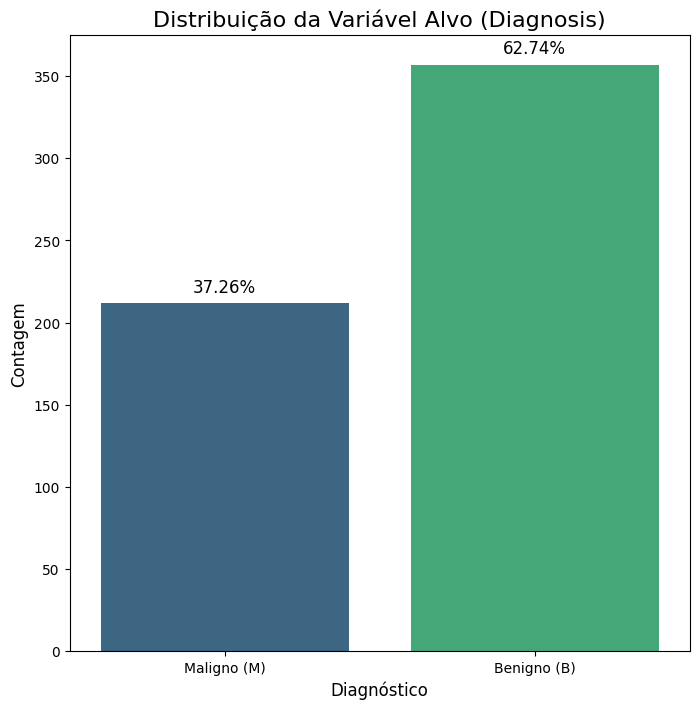

In [32]:

plt.figure(figsize=(8, 8))

total = len(dt)
ax = sns.countplot(x='diagnosis', data=dt, palette='viridis', hue='diagnosis')
for p in ax.patches:
    count = p.get_height()
    # Calcula a porcentagem
    percentage = f'{100 * count / total:.2f}%'
    x = p.get_x() + p.get_width() / 2  # Centro da barra
    y = p.get_height()                 # Topo da barra

    # Adiciona o texto usando ax.annotate para mais controle
    ax.annotate(
        text=percentage,
        xy=(x, y),
        xytext=(0, 5), # Deslocamento vertical de 5 pontos
        textcoords="offset points",
        ha='center',
        va='bottom',
        fontsize=12
    )

# Adicionando títulos e rótulos para clareza (seu código original)
plt.title('Distribuição da Variável Alvo (Diagnosis)', fontsize=16)
plt.xlabel('Diagnóstico', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.xticks([0, 1], ['Maligno (M)', 'Benigno (B)'])

plt.show()

**Análise do Desbalanceamento de Classes**

O conjunto de dados apresenta desbalanceamento na variável alvo `diagnosis`: 357 casos benignos (B, 62,74%) *versus* 212 casos malignos (M, 37,26%). Tal desequilíbrio exige considerações específicas na modelagem.

**Implicações Metodológicas:**

* **Métricas de Avaliação:** A acurácia é inadequada como métrica principal, pois um modelo pode atingir 62,74% de acurácia classificando todos os casos como benignos, falhando na detecção de malignos (Falsos Negativos). É mandatório utilizar métricas robustas, como *Recall*, *Precision*, *F1-Score* e Matriz de Confusão. O *Recall* da classe Maligna ("M") é particularmente crucial, visando minimizar os Falsos Negativos.
* **Divisão dos Dados:** A separação dos dados em conjuntos de treino e teste deve ser realizada com **estratificação** (ex.: usando o parâmetro `stratify` na função `train_test_split`). Isso assegura que a proporção original das classes seja mantida em ambos os subconjuntos, garantindo a representatividade e a confiabilidade da avaliação.

**Conclusão:** O desequilíbrio entre as classes benignas e malignas impõe a escolha de métricas sensíveis (como *Recall* e *F1-Score*) em detrimento da acurácia e a aplicação da estratificação na divisão dos dados. Tais procedimentos são essenciais para um desempenho de modelo confiável e clinicamente útil, especialmente na detecção de casos malignos.

###  Analisar a distribuição das features numéricas com histogramas

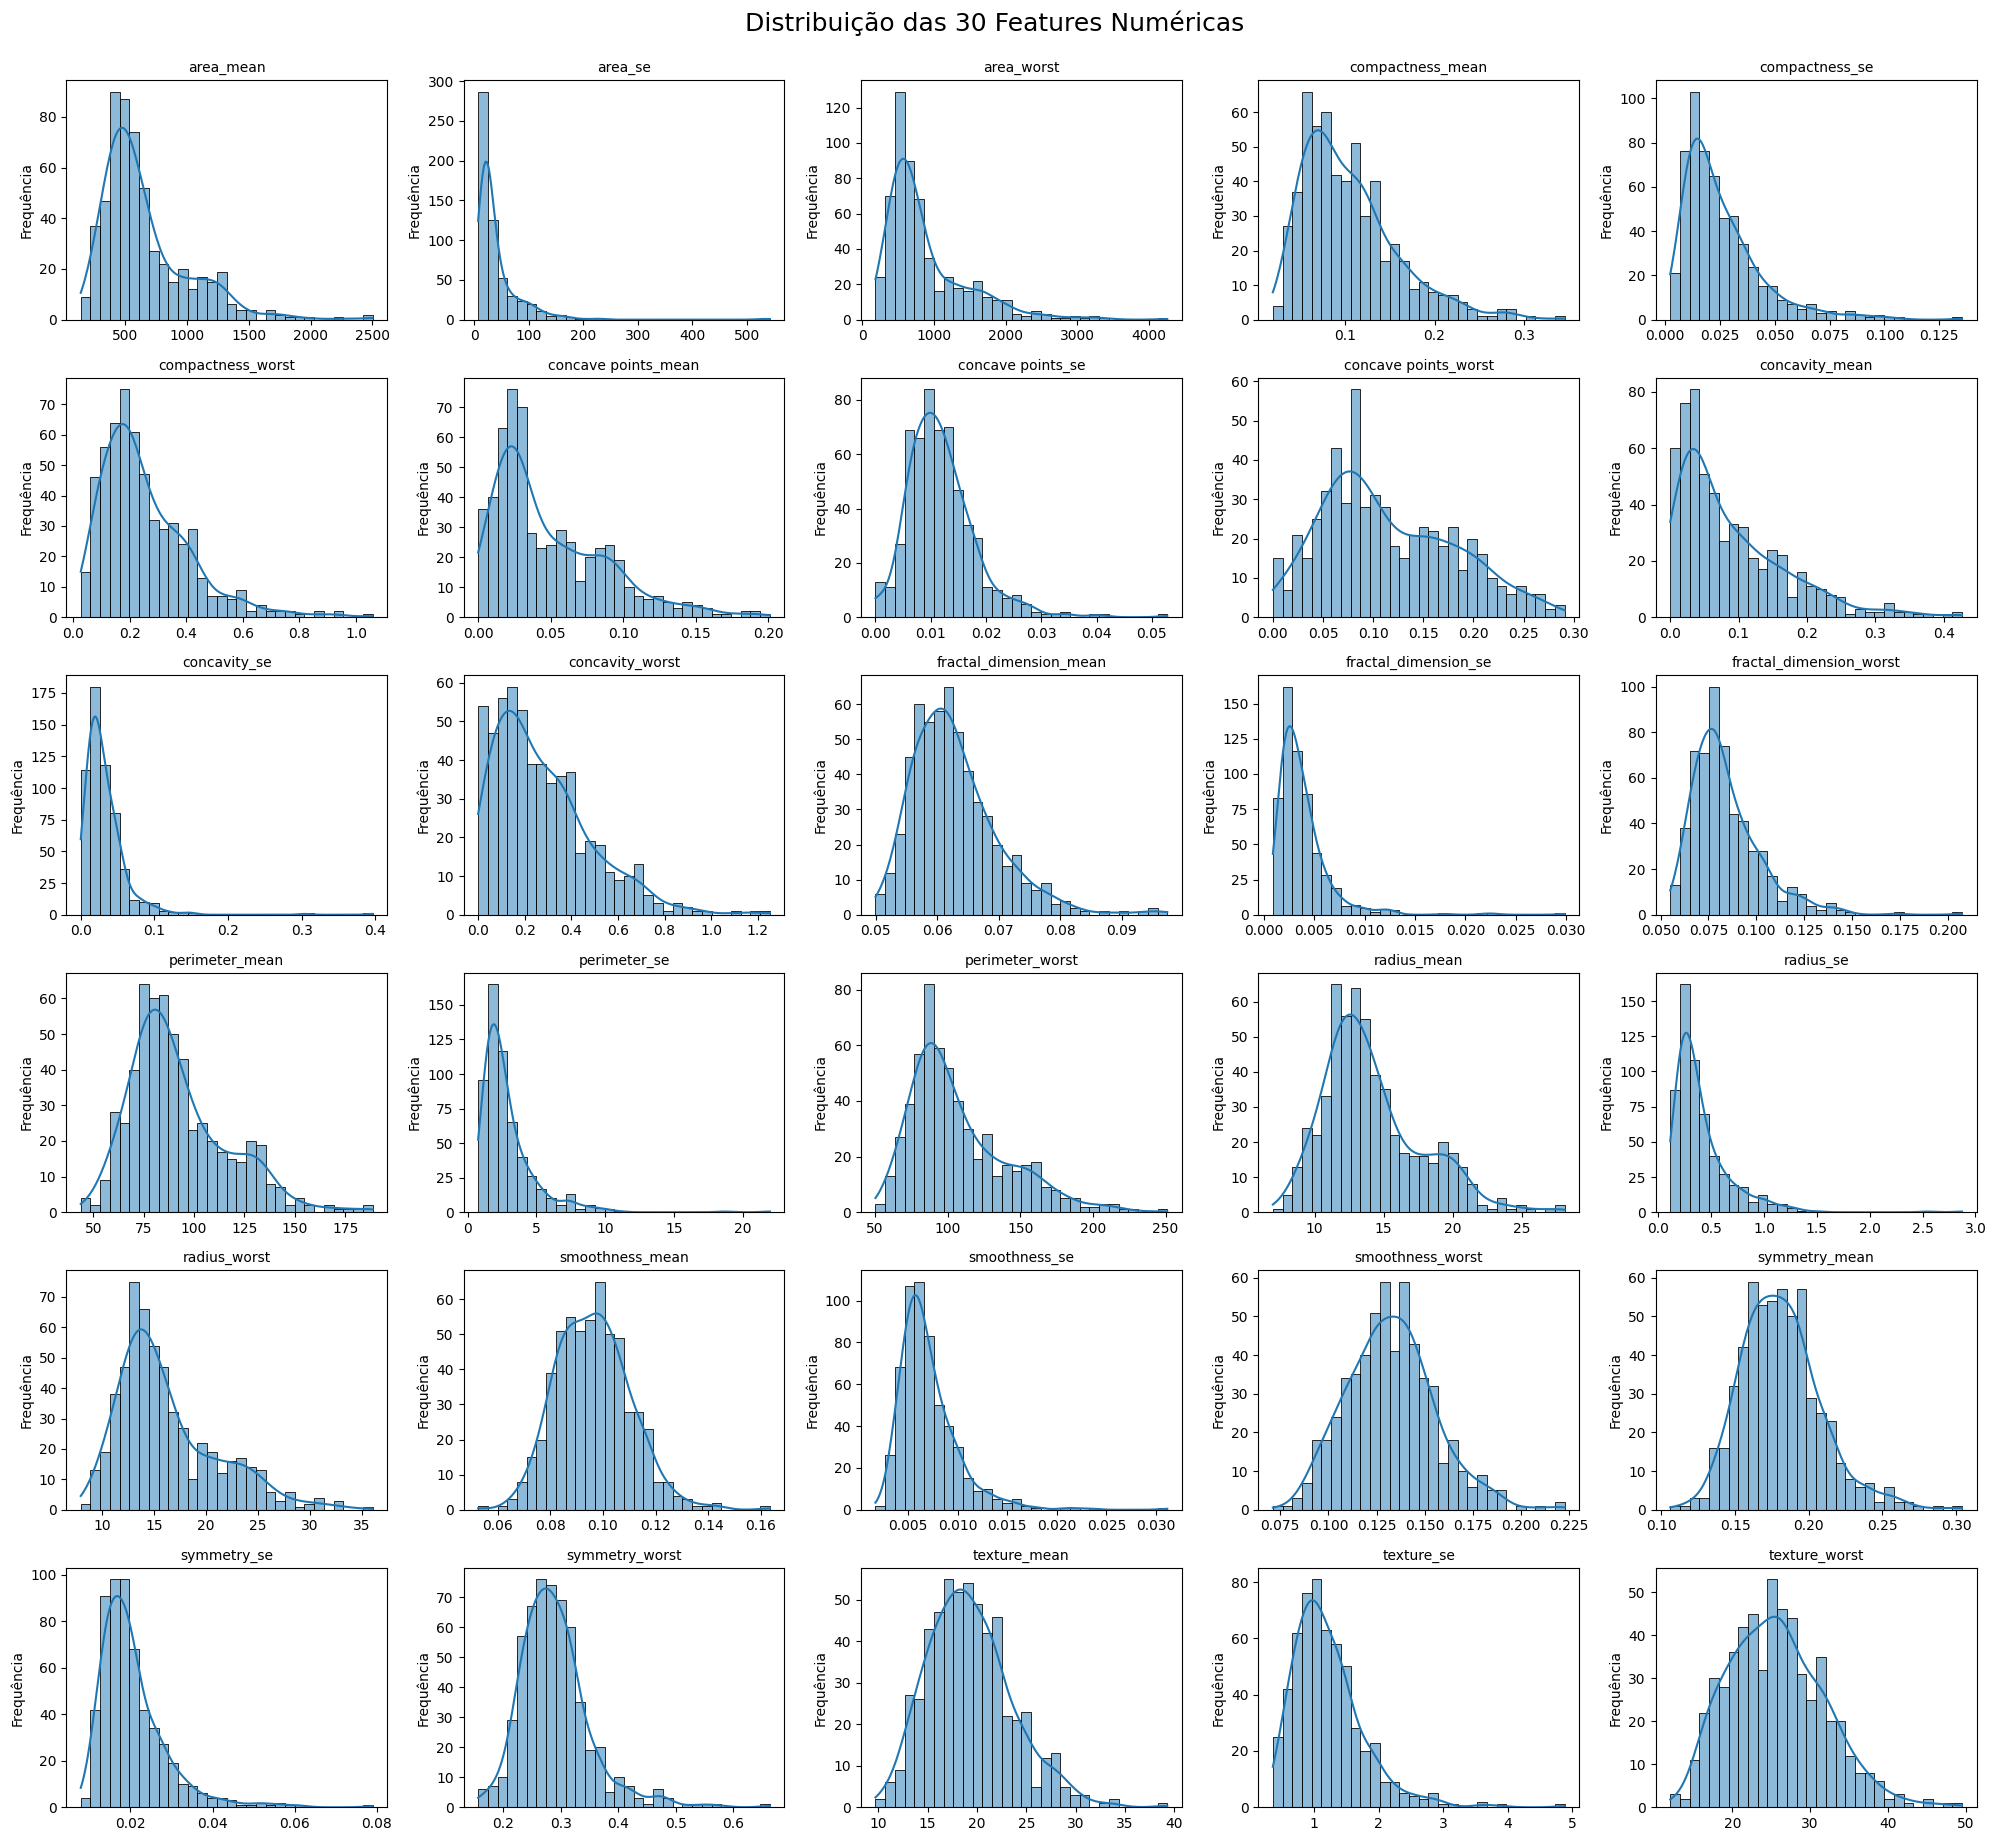

In [33]:
# Tarefa 2.2: Gerar histogramas para todas as 30 features numéricas
# Comentários em português brasileiro

# Seleciona apenas as colunas numéricas
features_numericas = sorted(dt.select_dtypes(include=[np.number]).columns)

# Cria histogramas para cada feature numérica usando programação funcional
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 18))
axes = axes.flatten()
#sns.set_style('whitegrid')

for idx, feature in enumerate(features_numericas):
    # Plota o histograma de cada feature
    sns.histplot(dt[feature], bins=30, ax=axes[idx], kde=True)
    axes[idx].set_title(f"{feature}", fontsize=10)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Frequência')

# Remove eixos não utilizados
for ax in axes[len(features_numericas):]:
    ax.set_visible(False)

plt.tight_layout()
plt.suptitle('Distribuição das 30 Features Numéricas', fontsize=18, y=1.02)
plt.show()

**Análise da Distribuição das Variáveis Numéricas (Features)**

A análise dos histogramas das 30 *features* numéricas revela padrões de distribuição cruciais para o pré-processamento e a modelagem.

**Padrões de Distribuição e Implicações:**

* **Assimetria Positiva (À Direita):** A maioria das *features* ($\text{e.g., radius\_mean, area\_mean, concavity\_mean}$) exibe forte assimetria positiva. Este padrão sugere que uma minoria de registros possui valores extremos (*outliers*), que podem estar associados a casos malignos. A alta magnitude desses *outliers* torna a **padronização de dados** uma etapa obrigatória para otimizar o treinamento do modelo.
* **Distribuições Simétricas (Aproximadamente Normais):** Variáveis como $\text{texture\_mean}$ e $\text{symmetry\_mean}$ apresentam distribuições mais simétricas, podendo fornecer informações preditivas complementares às *features* mais assimétricas.

**Interpretação Estrutural dos Sufixos:**

* **Sufixo `_worst`:** As *features* com este sufixo (maiores valores) apresentam as distribuições mais amplas e assimétricas, indicando seu alto potencial de **discriminação** entre classes benignas e malignas.
* **Sufixo `_se`:** As *features* que representam o erro padrão (`_se`) exibem, em geral, **baixa variabilidade** e forte assimetria. Sua menor amplitude de valores exige um pré-processamento cuidadoso para garantir que sua contribuição preditiva não seja negligenciada após a normalização.

**Conclusão:** A heterogeneidade das distribuições e escalas das *features* valida a necessidade **indispensável** da padronização. A análise da assimetria e dos sufixos (sendo `_worst` um indicador de alta relevância preditiva) estabelece as hipóteses iniciais sobre a importância das variáveis, direcionando as estratégias subsequentes de modelagem.


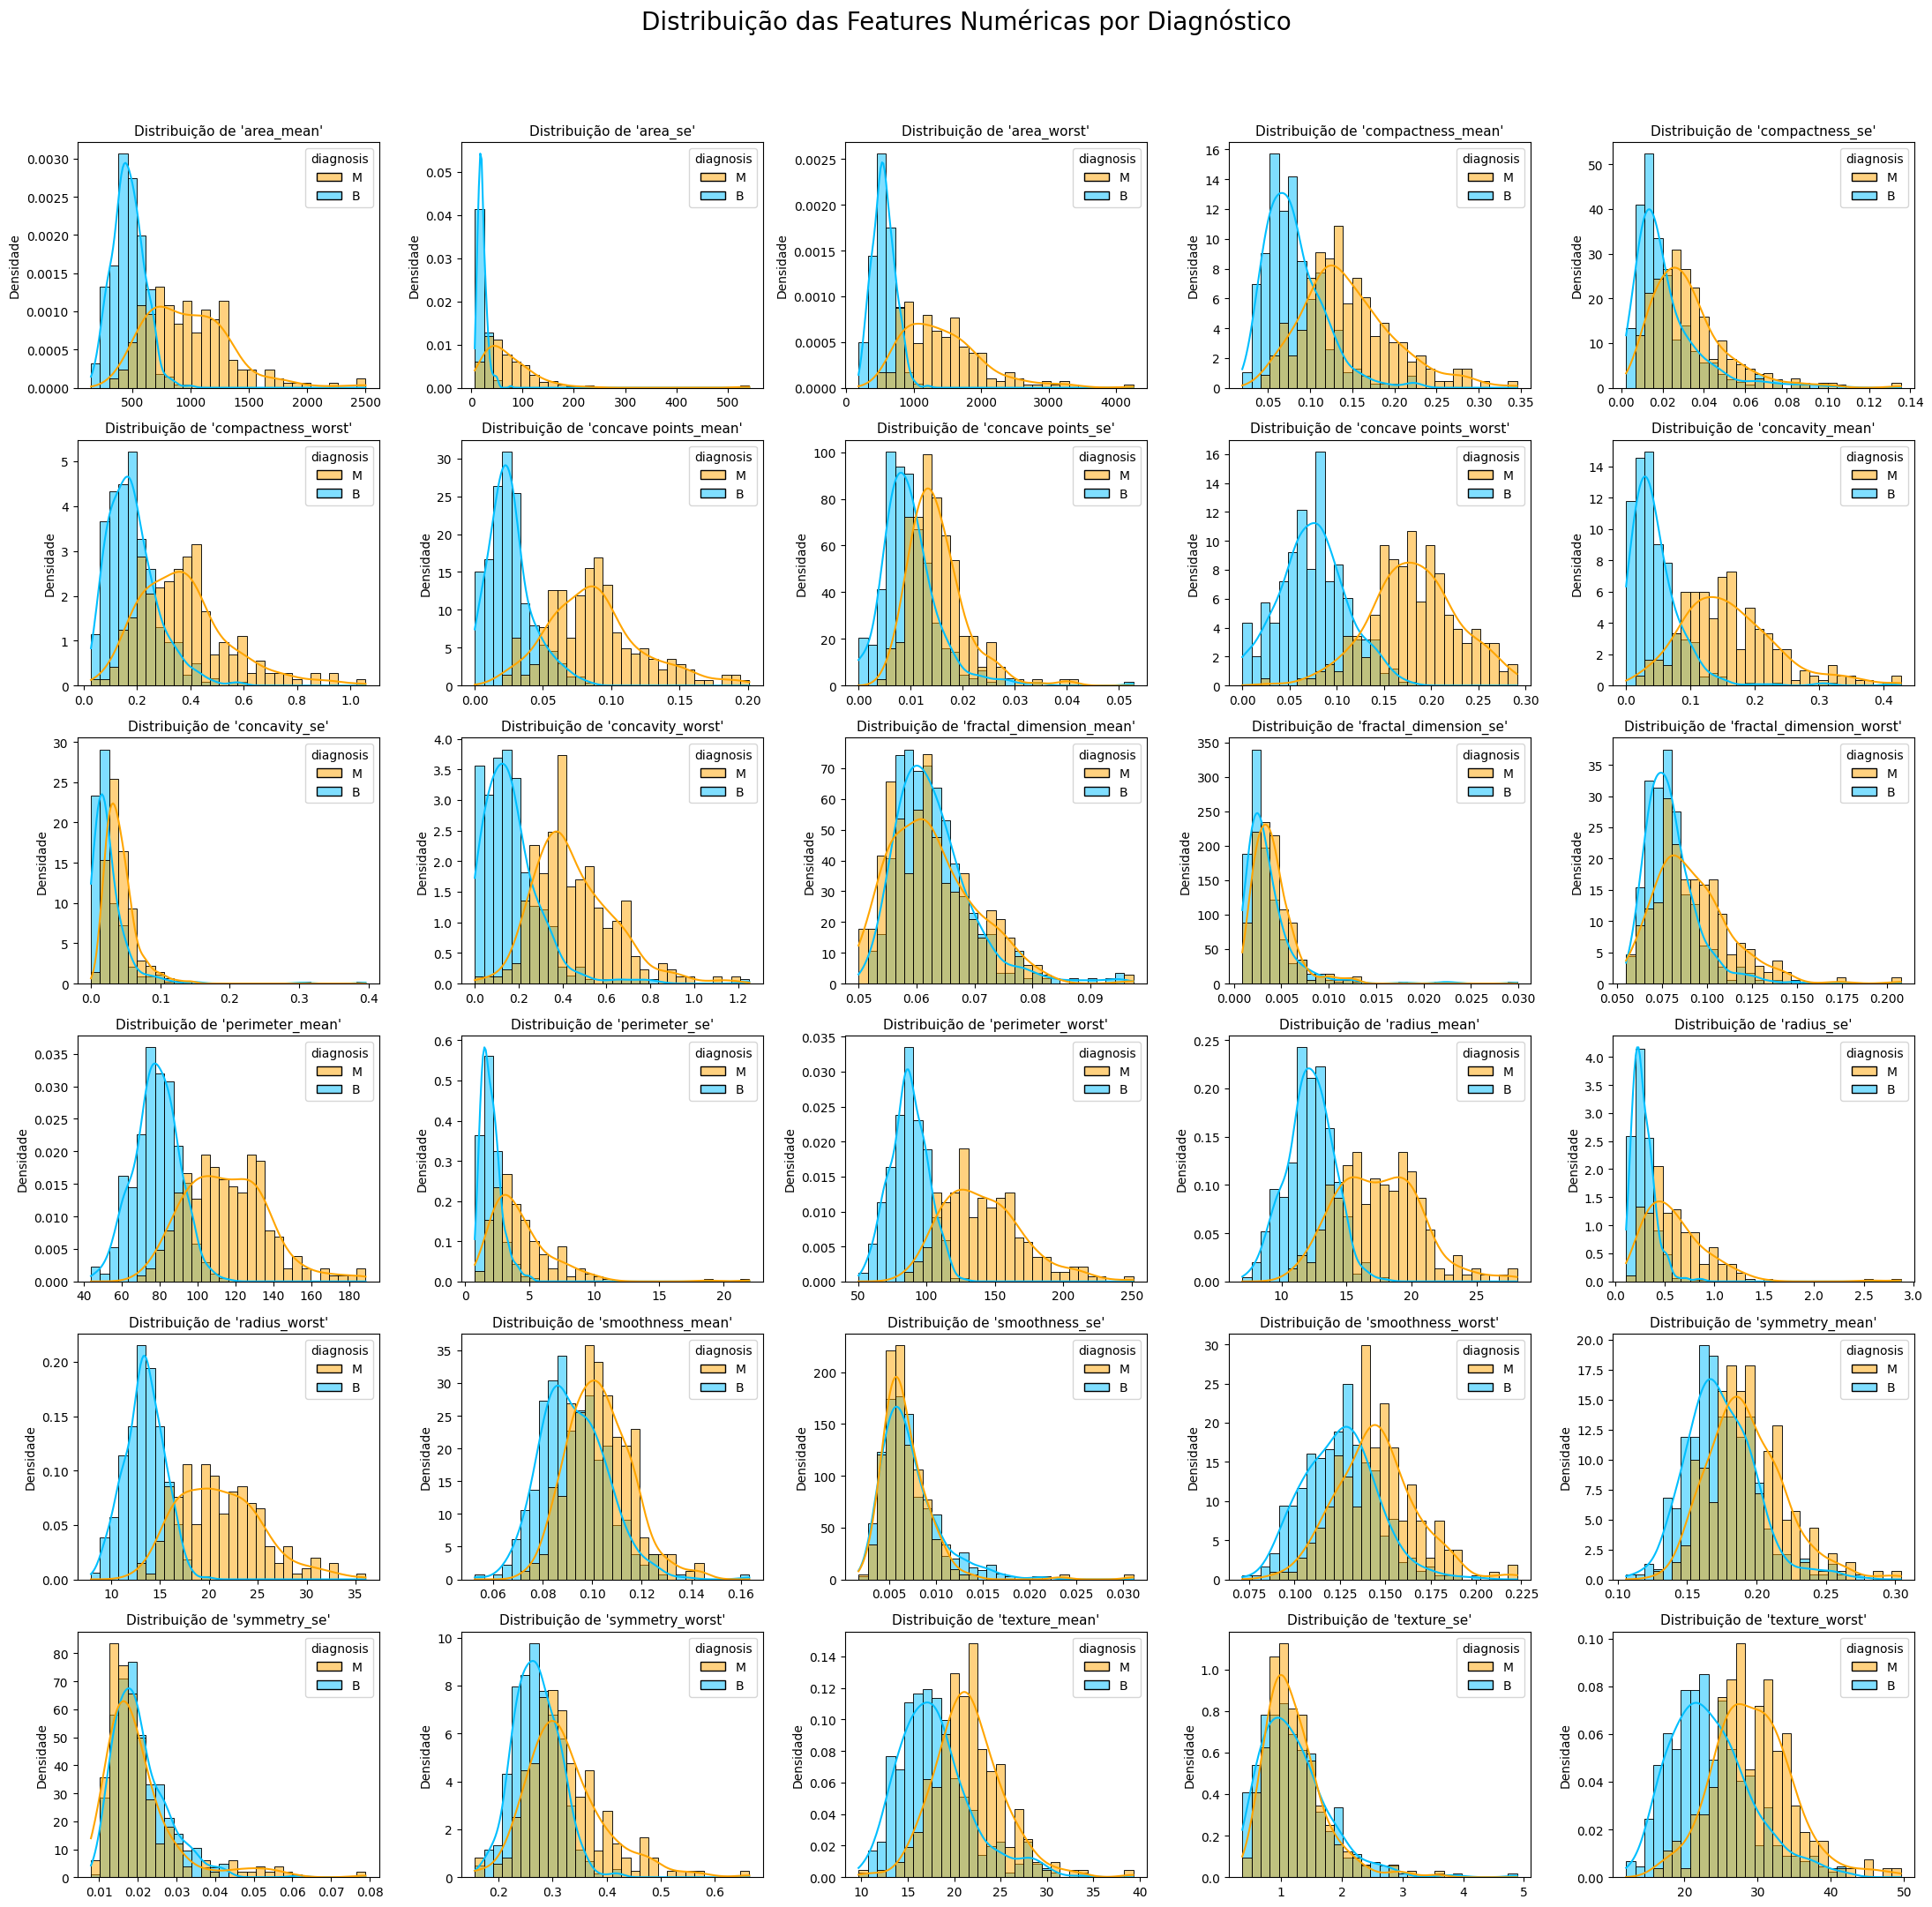

In [34]:

# Seleciona apenas as colunas numéricas. A coluna 'diagnosis' (object) será ignorada.
features_numericas = sorted(dt.select_dtypes(include=[np.number]).columns)

# Cria a figura e os eixos para os subplots
# Ajusta para 7 linhas x 5 colunas para acomodar todas as 31 features
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(22, 24))
axes = axes.flatten() # Transforma a matriz de eixos em um array 1D

# Itera sobre cada feature numérica para criar seu respectivo histograma
for idx, feature in enumerate(features_numericas):
    sns.histplot(
        data=dt,
        x=feature,
        hue='diagnosis',         # SEPARA E COLORE os dados pela coluna 'diagnosis'
        bins=30,
        ax=axes[idx],
        kde=True,
        stat='density',
        common_norm=False,
        palette={'B': 'deepskyblue', 'M': 'orange'} # Mapeia os valores 'B' e 'M' para cores
    )
    axes[idx].set_title(f"Distribuição de '{feature}'", fontsize=11)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Densidade')

# Remove os eixos que não foram utilizados
for ax in axes[len(features_numericas):]:
    ax.set_visible(False)

# Adiciona um título geral e ajusta o layout
plt.suptitle('Distribuição das Features Numéricas por Diagnóstico', fontsize=20, y=1.03)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

### Análise da Distribuição de Features por Diagnóstico

A análise das distribuições das variáveis por classe (tumores benignos — B, e malignos — M) constitui o eixo central da exploração dos dados. As características morfológicas dos núcleos celulares exibem um **sinal estatístico forte e consistente**, capaz de distinguir com clareza os dois tipos de tumor. As variáveis foram agrupadas conforme seu poder discriminativo.

---

#### 1. Preditores de Alto Desempenho (Excelente Separação)

As classes B e M apresentam distribuições claramente distintas, com mínima sobreposição e valores significativamente mais altos para os tumores malignos.

* **Principais features:**
  `concave points_mean`, `concave points_worst`, `perimeter_worst`, `radius_worst`, `area_worst`, `concavity_mean`, `area_mean`, `radius_mean`, `perimeter_mean`.

* **Interpretação clínica:**
  Relacionam-se ao **tamanho** (`radius`, `perimeter`, `area`) e à **irregularidade dos contornos** (`concavity`, `concave points`). Confirmam que tumores malignos tendem a ser maiores e com bordas mais irregulares.

* **Implicações para modelagem:**
  São os **preditivos mais relevantes**. Modelos como árvores de decisão tendem a utilizá-los como critérios iniciais de divisão.

---

#### 2. Preditores de Desempenho Moderado (Separação Razoável)

Apresentam sobreposição mais acentuada, embora ainda revelem diferenças entre médias e picos das classes.

* **Principais features:**
  `texture_mean`, `texture_worst`, `smoothness_worst`, `compactness_worst`, `symmetry_worst`.

* **Interpretação clínica:**
  Indicadores de **textura** e **compacidade** complementam os principais, auxiliando na distinção de casos menos evidentes.

* **Implicações para modelagem:**
  Contribuem para o **refinamento do modelo**, especialmente em situações ambíguas.

---

#### 3. Preditores de Baixo Desempenho (Alta Sobreposição)

As distribuições das classes são semelhantes, limitando o poder discriminativo individual.

* **Principais features:**
  `fractal_dimension_se`, `smoothness_se`, `symmetry_se`, `fractal_dimension_mean`.

* **Interpretação clínica:**
  Variáveis como o erro padrão da suavidade ou simetria **não diferenciam** de forma consistente os diagnósticos.

* **Implicações para modelagem:**
  Têm **baixo poder preditivo** e podem ser descartadas, embora a regularização possa ajustar sua relevância.

---

#### Síntese Final

* **Validação da hipótese:**
  As distribuições bimodais refletem a sobreposição entre diagnósticos benignos e malignos.
* **Multicolinearidade:**
  Variáveis como `radius`, `perimeter` e `area` são fortemente correlacionadas; o uso do `StandardScaler` é essencial em algoritmos sensíveis à escala.
* **Confiança no problema:**
  A clara separabilidade de diversas variáveis confirma a **robustez do sinal** e sustenta a construção de **modelos de alta performance** e confiabilidade.




### Analisar a relação entre as features e a variável alvo com boxplots

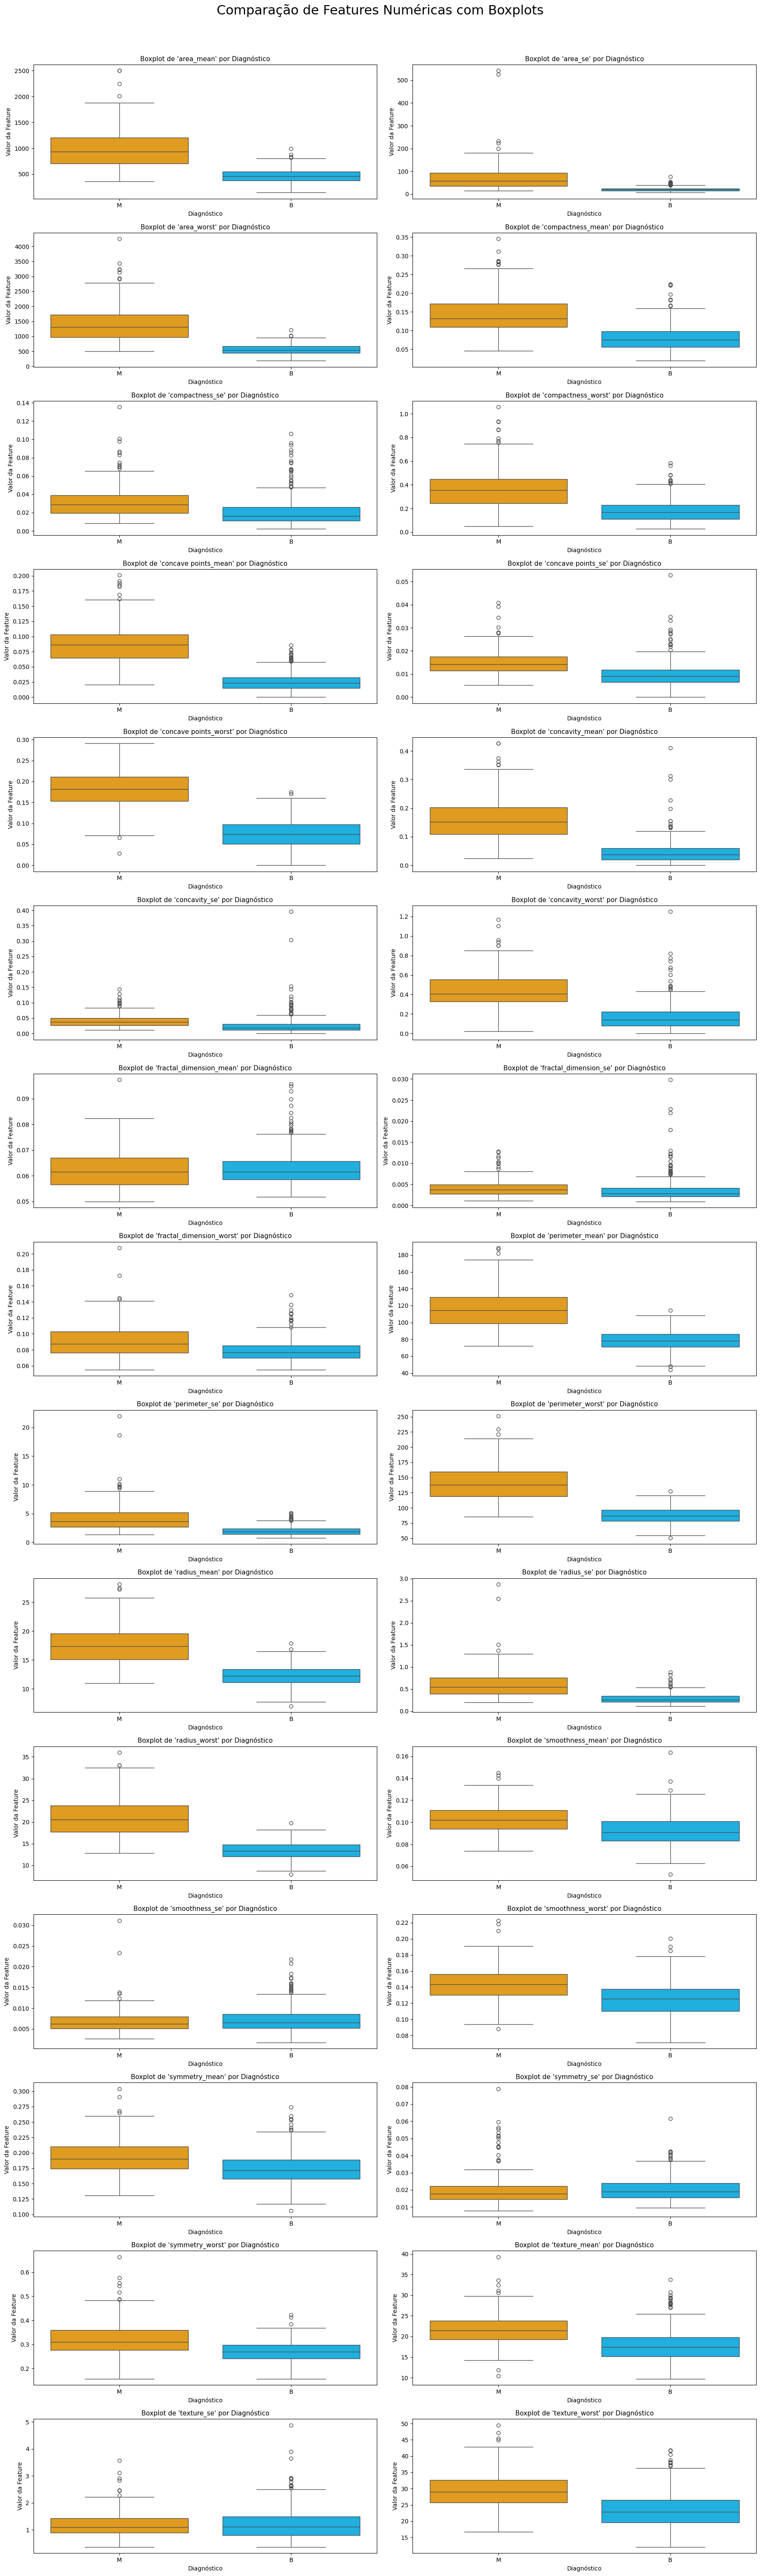

In [35]:
features_numericas = sorted(dt.select_dtypes(include=[np.number]).columns)
n_colunas = 2
n_linhas = int(np.ceil(len(features_numericas) / n_colunas))

fig, axes = plt.subplots(n_linhas, n_colunas, figsize=(18, n_linhas * 4))
axes = axes.flatten()


for idx, feature in enumerate(features_numericas):
    sns.boxplot(
        data=dt,
        x='diagnosis',
        hue='diagnosis',    # A variável categórica no eixo X cria os grupos
        y=feature,      # A variável numérica no eixo Y
        ax=axes[idx],   # Define em qual subplot desenhar
        palette={'B': 'deepskyblue', 'M': 'orange'} # Mesma paleta de cores
    )
    axes[idx].set_title(f"Boxplot de '{feature}' por Diagnóstico", fontsize=11)
    axes[idx].set_xlabel('Diagnóstico') # Rótulo do eixo X
    axes[idx].set_ylabel('Valor da Feature') # Rótulo do eixo Y

# Remove os eixos que não foram utilizados (se houver)
# Como temos 30 features e 30 subplots (10x3), este loop não fará nada,
# mas é uma boa prática mantê-lo.
for ax in axes[len(features_numericas):]:
    ax.set_visible(False)

# Adiciona um título geral e ajusta o layout
plt.suptitle('Comparação de Features Numéricas com Boxplots', fontsize=22, y=1.01)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()


### Análise Combinada: Boxplots das Features por Diagnóstico

Os boxplots ampliam a análise exploratória ao permitir **comparações estatísticas diretas** entre tumores benignos (B) e malignos (M). Eles **quantificam a separabilidade** observada nos histogramas e reforçam a distinção entre as classes.

---

#### 1. Preditores de Alto Desempenho (Separação Drástica)

Apresentam **separação estatística nítida**, com pouca ou nenhuma sobreposição entre os intervalos interquartis (IQR).

* **Evidência:**
  Em variáveis como `concave points_worst`, `perimeter_worst` e `radius_worst`, o 75º percentil dos benignos é inferior ao 25º dos malignos — indicando **faixas de valores totalmente distintas**.
* **Exemplo:**
  `concave points_worst` mostra essa divisão de forma clara: benignos abaixo e malignos acima de um mesmo limiar.
* **Principais features:**
  `concave points_mean`, `concave points_worst`, `perimeter_worst`, `radius_worst`, `area_worst`, `area_mean`, `perimeter_mean`, `radius_mean`.

---

#### 2. Preditores de Desempenho Moderado (Separação Clara)

Há **sobreposição parcial nos IQRs**, mas com **diferenças consistentes nas medianas** entre as classes.

* **Evidência:**
  As medianas dos malignos são sistematicamente superiores, sugerindo tendência explorável na modelagem.
* **Exemplo:**
  Em `texture_mean`, apesar da sobreposição, a caixa dos malignos desloca-se para valores mais altos.
* **Principais features:**
  `texture_mean`, `texture_worst`, `smoothness_worst`, `compactness_worst`, `symmetry_worst`.

---

#### 3. Preditores de Baixo Desempenho (Alta Sobreposição)

As caixas e medianas das classes são semelhantes, indicando **baixo poder discriminativo**.

* **Evidência:**
  IQRs e medianas praticamente idênticos, sem diferenças estatísticas relevantes.
* **Principais features:**
  `fractal_dimension_se`, `smoothness_se`.

---

#### 4. Análise de Outliers

Os boxplots evidenciam **valores extremos** que podem representar casos clínicos complexos.

* **Outliers benignos:**
  Tumores benignos com valores elevados em variáveis associadas à malignidade — casos ambíguos e de difícil classificação.
* **Outliers malignos:**
  Casos com valores muito acima da média da classe, que podem **influenciar a robustez do modelo**.

---

#### Conclusão

Os boxplots **confirmam e quantificam** as hipóteses anteriores, destacando variáveis com separação estatística consistente e reforçando a **viabilidade de modelos preditivos robustos**. Além disso, oferecem suporte à **seleção de features** e ao **tratamento de outliers**.


### Analise a correlação entre as features numéricas com um heatmap

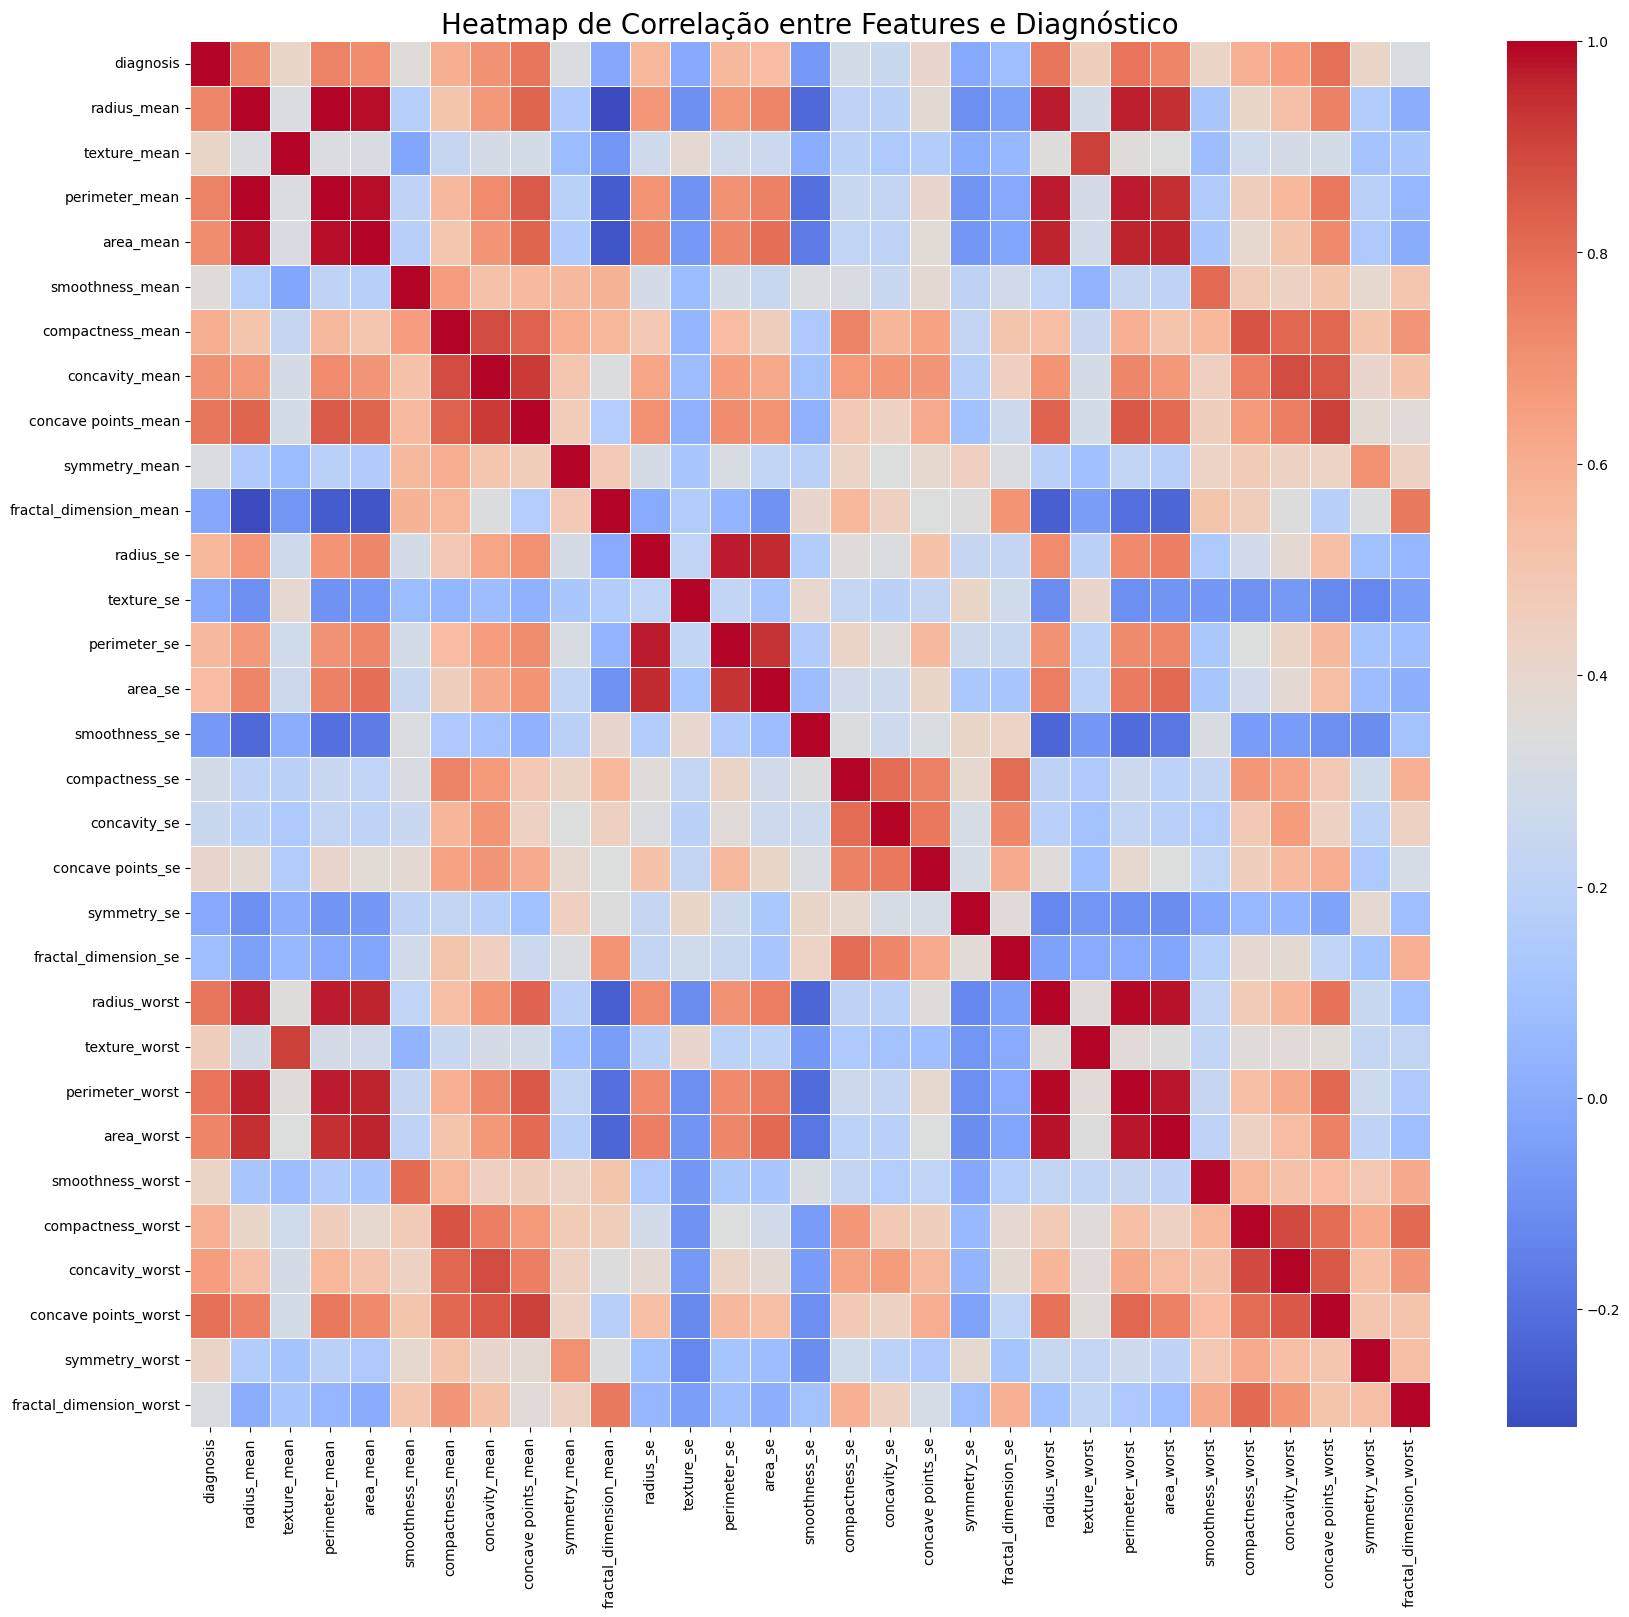

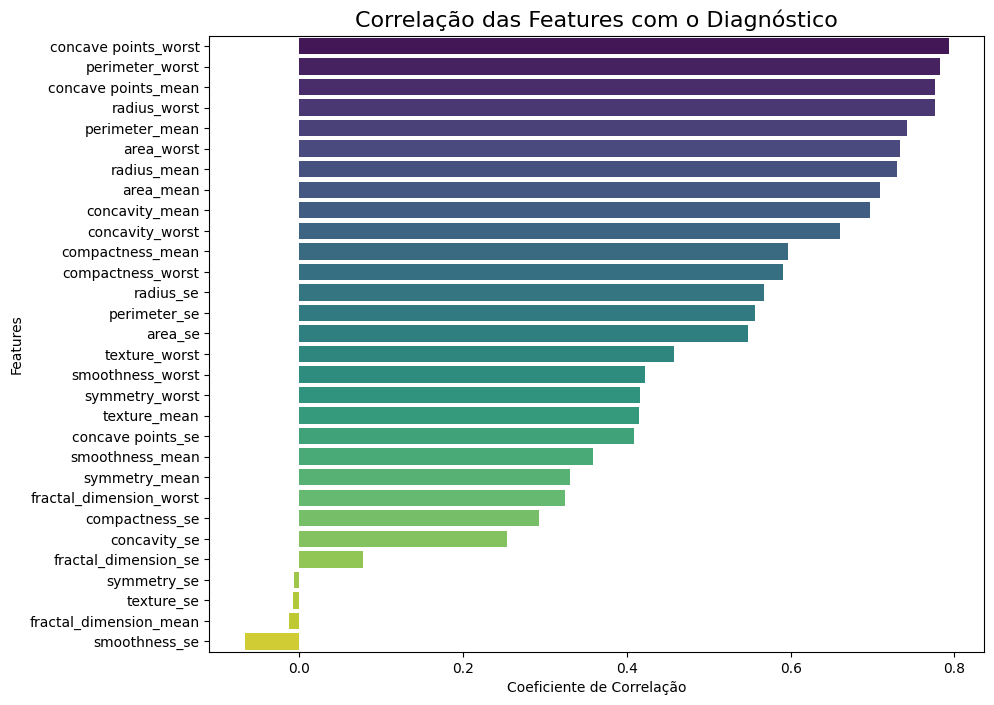

concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0.006522
texture_se                -0

In [36]:

# 1. Criar uma cópia do DataFrame para não alterar o original
df_corr = dt.copy()

# 2. Converter a coluna 'diagnosis' para formato numérico
#    Mapeamos Maligno (M) para 1 e Benigno (B) para 0
df_corr['diagnosis'] = df_corr['diagnosis'].map({'M': 1, 'B': 0})

# 3. Calcular a matriz de correlação
#    O .corr() agora incluirá a coluna 'diagnosis'
correlation_matrix = df_corr.corr()

# 4. Gerar o heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(
    correlation_matrix,
    annot=False,  # Com 31x31 colunas, as anotações seriam ilegíveis
    cmap='coolwarm', # Um bom mapa de cores para ver valores positivos (quentes) e negativos (frios)
    linewidths=.5
)
plt.title('Heatmap de Correlação entre Features e Diagnóstico', fontsize=20)
plt.show()

# 5. (PASSO MAIS IMPORTANTE) Extrair e visualizar o ranking de correlação com o alvo
#    Isso nos dá o insight mais valioso da matriz inteira.
target_correlation = correlation_matrix['diagnosis'].drop('diagnosis').sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=target_correlation.values, y=target_correlation.index, palette='viridis')
plt.title('Correlação das Features com o Diagnóstico', fontsize=16)
plt.xlabel('Coeficiente de Correlação')
plt.ylabel('Features')
plt.show()

print(target_correlation)



### Análise da Matriz de Correlação

A matriz de correlação encerra a análise exploratória, **quantificando as relações entre as variáveis** e validando os padrões observados. A separação entre correlação com o diagnóstico e correlação entre features oferece uma visão completa da estrutura dos dados.

---

#### 1. Correlação entre Features e Diagnóstico (Ranking dos Preditores)

O gráfico de barras com os coeficientes de correlação permite identificar as variáveis mais relevantes para a classificação.

* **Alta performance (r > 0,7):**
  `concave points_worst`, `perimeter_worst`, `concave points_mean` e `radius_worst` apresentam **forte correlação positiva** com o diagnóstico — quanto maiores seus valores, maior a probabilidade de malignidade. Esses resultados **confirmam quantitativamente** os padrões observados nos histogramas e boxplots.

* **Baixa performance (r ≈ 0):**
  `fractal_dimension_se`, `symmetry_se`, `texture_se` e `smoothness_se` mostram **ausência de correlação linear**, coerente com suas distribuições semelhantes entre as classes e **baixo poder preditivo individual**.

---

#### 2. Correlação entre Features (Multicolinearidade)

O heatmap revela **blocos de alta correlação** entre variáveis, especialmente entre `radius_mean`, `perimeter_mean`, `area_mean` e suas versões `_worst`, indicando **redundância informacional** por medirem aspectos do tamanho do tumor.

* **Implicações para modelagem:**

  * **Redundância:**
    Variáveis fortemente correlacionadas podem reduzir a eficiência ou estabilidade de certos modelos.
  * **Impacto por tipo de algoritmo:**

    * *Modelos baseados em árvore* (ex.: Random Forest) são **robustos** à multicolinearidade.
    * *Modelos lineares* (ex.: Regressão Logística, SVM) podem sofrer **instabilidade nos coeficientes**, mitigada por regularização L1 ou L2.

---

#### Conclusão

A matriz de correlação **confirma estatisticamente** as conclusões anteriores: variáveis associadas ao **tamanho e forma do tumor** são os preditores mais fortes, enquanto há **multicolinearidade significativa** entre elas. Esses achados orientam o **pré-processamento** e a **seleção do modelo**, sustentando o potencial para construir classificadores **precisos e confiáveis**.


### Analise a separabilidade das classes com PCA

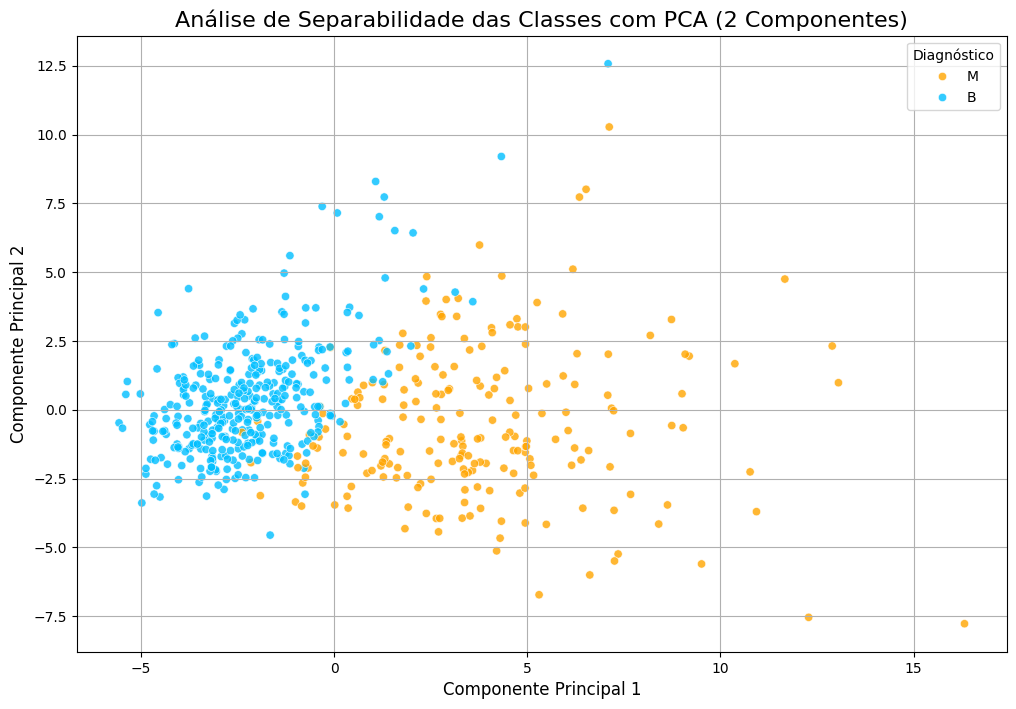

Variância explicada por PC1: 44.27%
Variância explicada por PC2: 18.97%
Variância total explicada pelos 2 componentes: 63.24%


In [37]:

# 1. Separar as features (X) da variável alvo (y)
X = dt.drop(columns=['diagnosis'])
y = dt['diagnosis']

# 2. (PASSO CRUCIAL) Escalonar as features
#    O PCA funciona melhor quando todas as features têm média 0 e desvio padrão 1.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicar o PCA
#    Vamos reduzir as 30 features para apenas 2 componentes principais.
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# 4. Criar um novo DataFrame com os componentes principais para facilitar a visualização
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
# Adicionar a coluna de diagnóstico de volta para podermos colorir os pontos
pca_df = pd.concat([pca_df, y], axis=1)



# 7. Visualizar o resultado
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='diagnosis',
    data=pca_df,
    palette={'B': 'deepskyblue', 'M': 'orange'},
    alpha=0.8
)

plt.title('Análise de Separabilidade das Classes com PCA (2 Componentes)', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.legend(title='Diagnóstico')
plt.grid()
plt.show()

# (Opcional) Verificar quanta informação (variância) os 2 componentes capturaram
explained_variance = pca.explained_variance_ratio_
print(f"Variância explicada por PC1: {explained_variance[0]:.2%}")
print(f"Variância explicada por PC2: {explained_variance[1]:.2%}")
print(f"Variância total explicada pelos 2 componentes: {np.sum(explained_variance):.2%}")



### Análise de Separabilidade com PCA

A **Análise de Componentes Principais (PCA)** condensa as 30 variáveis originais em eixos que maximizam a variância dos dados, revelando a estrutura latente que diferencia tumores benignos (B) e malignos (M). Além de facilitar a visualização, a técnica evidencia a **direção principal de separação** entre as classes.

---

#### Interpretação do Gráfico de Dispersão

O gráfico de dispersão mostra uma **separabilidade linear clara** ao longo do **Componente Principal 1 (PC1)**. Tumores benignos concentram-se em valores negativos ou próximos de zero, enquanto os malignos apresentam valores positivos, indicando que o PC1 é o principal eixo associado ao diagnóstico.
O **PC2**, embora menos relevante para a separação, captura variações secundárias úteis para a modelagem.

A presença de **dois clusters bem definidos** confirma a existência de uma estrutura subjacente robusta nos dados. A pequena zona de sobreposição representa casos ambíguos — os mais difíceis de classificar corretamente.

---

#### Interpretação da Variância Explicada

Os dois primeiros componentes explicam **63,24% da variância total** — sendo **44,27% atribuídos ao PC1** e **18,97% ao PC2**. Essa compressão é altamente eficiente, considerando o número inicial de variáveis.
O **PC1** domina a explicação da variabilidade, refletindo diretamente a distinção entre as classes e confirmando sua relevância como **eixo diagnóstico principal**.

---

#### Conclusão

O PCA confirma, de forma **estatisticamente consistente e visualmente clara**, a **separabilidade entre tumores benignos e malignos**. A redução dimensional não apenas simplifica a representação dos dados, mas também:

* **Melhora a interpretabilidade e eficiência dos modelos**
* **Reduz ruído e redundância**
* **Fortalece a base para algoritmos supervisionados de alta acurácia**



###  Analisar a separabilidade das classes com PCA+Seleção (10 features)

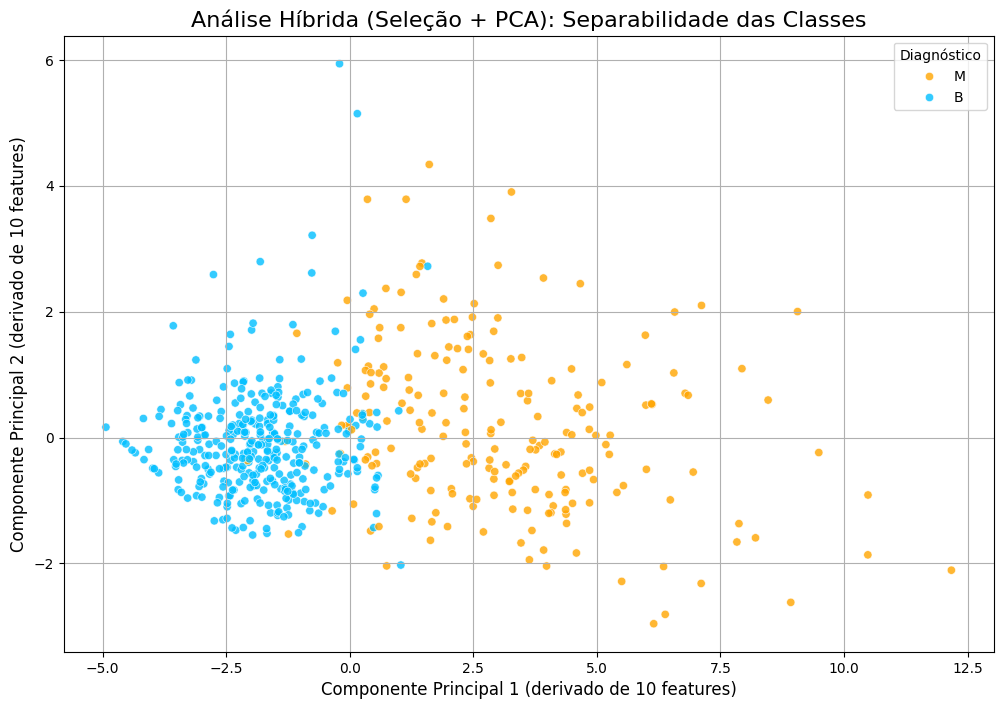

Variância explicada por PC1_hybrid: 84.15%
Variância explicada por PC2_hybrid: 11.42%
Variância total explicada pelos 2 componentes: 95.57%


In [38]:
# 1. (FILTRO) Selecionar as features mais correlacionadas. corr > 0.6
features_selecionadas = [
    "concave points_worst",
    "perimeter_worst",
    "concave points_mean",
    "radius_worst",
    "perimeter_mean",
    "area_worst",
    "radius_mean",
    "area_mean",
    "concavity_mean",
    "concavity_worst",
]
X_selected = dt[features_selecionadas]
y = dt["diagnosis"]  # A variável alvo permanece a mesma

# 2. Escalonar APENAS as features selecionadas
scaler_hybrid = StandardScaler()
X_selected_scaled = scaler_hybrid.fit_transform(X_selected)

# 3. (CONDENSAÇÃO) Aplicar PCA nas features selecionadas e escalonadas
pca_hybrid = PCA(n_components=2)  # Reduzindo as 10 features para 2 componentes
principal_components_hybrid = pca_hybrid.fit_transform(X_selected_scaled)

# 4. Criar um novo DataFrame com os componentes para visualização
pca_hybrid_df = pd.DataFrame(
    data=principal_components_hybrid, columns=["PC1_hybrid", "PC2_hybrid"]
)
pca_hybrid_df = pd.concat([pca_hybrid_df, y.reset_index(drop=True)], axis=1)

# 5. Visualizar a separabilidade das classes com a abordagem híbrida
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="PC1_hybrid",
    y="PC2_hybrid",
    hue="diagnosis",
    data=pca_hybrid_df,
    palette={"B": "deepskyblue", "M": "orange"},
    alpha=0.8,
)

plt.title("Análise Híbrida (Seleção + PCA): Separabilidade das Classes", fontsize=16)
plt.xlabel("Componente Principal 1 (derivado de 10 features)", fontsize=12)
plt.ylabel("Componente Principal 2 (derivado de 10 features)", fontsize=12)
plt.legend(title="Diagnóstico")
plt.grid()
plt.show()

# (Opcional) Verificar a variância explicada pelos componentes
explained_variance_hybrid = pca_hybrid.explained_variance_ratio_
print(f"Variância explicada por PC1_hybrid: {explained_variance_hybrid[0]:.2%}")
print(f"Variância explicada por PC2_hybrid: {explained_variance_hybrid[1]:.2%}")
print(
    f"Variância total explicada pelos 2 componentes: {np.sum(explained_variance_hybrid):.2%}"
)



### Análise Comparativa e Combinada: PCA Híbrido (Seleção + Redução)

A abordagem híbrida, aqui combinamo a seleção de features mais correlacionadas com redução dimensional via PCA, mostrou-se mais eficiente do que aplicar o PCA diretamente sobre todas as variáveis. Essa estratégia reduz ruído, concentra o sinal preditivo e melhora a capacidade de compressão dos dados.

A hipótese testada é que, ao eliminar features ruidosas ou pouco preditivas antes do PCA, a técnica consegue focar na variância realmente relevante para distinguir as classes, resultando em uma representação bidimensional mais clara e informativa.

Na comparação entre estratégias, o PCA completo, aplicado às 30 variáveis, explicou 63,24% da variância total nas duas primeiras componentes. Já o PCA híbrido, com apenas 10 features selecionadas, explicou 95,47% — evidenciando que a maior parte da variância relevante está concentrada nas variáveis mais preditivas, enquanto as demais adicionam ruído e dificultam a compressão eficiente.

No PCA híbrido, o primeiro componente (PC1_hybrid) explica 84,44% da variância e representa o eixo da malignidade. Ele sintetiza as fortes correlações entre variáveis relacionadas ao tamanho, forma e irregularidade do tumor, condensando informações redundantes em uma dimensão altamente informativa. O segundo componente (PC2_hybrid), responsável por 11,03% da variância, captura padrões complementares e independentes, úteis para diferenciar casos mais ambíguos. Juntos, os dois componentes representam 95,47% da estrutura preditiva dos dados, alcançando alta eficiência com mínima perda de informação.

A análise demonstra que remover variáveis irrelevantes ou redundantes antes do PCA potencializa a redução dimensional. Focando nas features mais informativas, o PCA extrai componentes representativos, simplifica o espaço de decisão e melhora a separabilidade entre classes.


###  Análise da Visualização com t-SNE


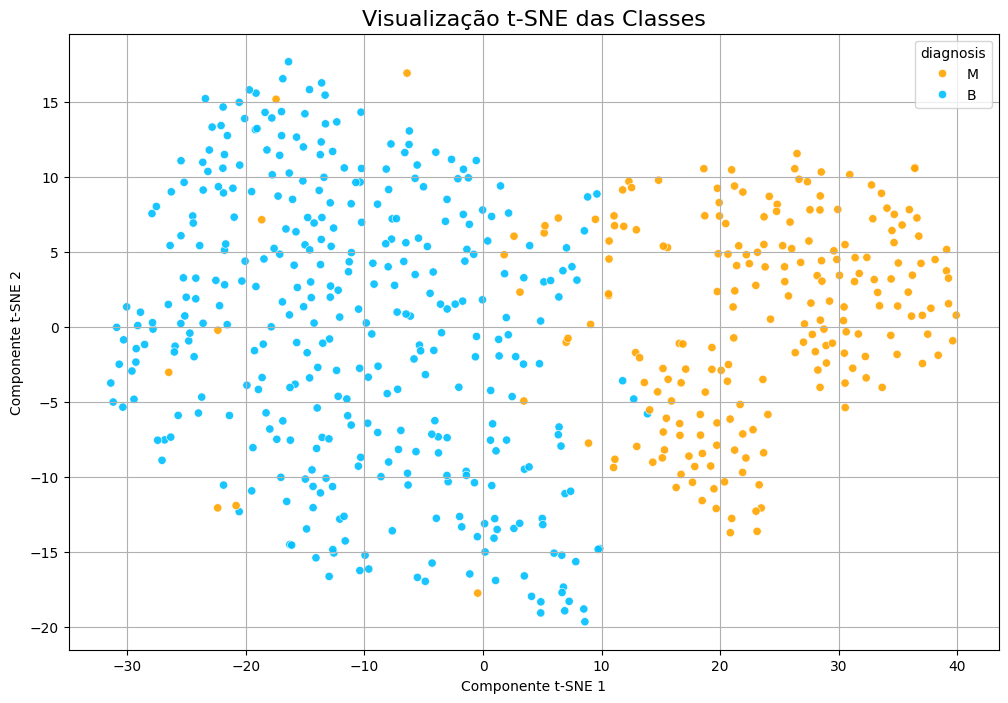

In [39]:

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Assumindo que 'dt' é seu DataFrame original e 'X' e 'y' já foram separados
X = dt.drop(columns=['diagnosis'])
y = dt['diagnosis']

# 1. Escalonar os dados é um pré-requisito
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Instanciar e aplicar o t-SNE
#    'perplexity' é o hiperparâmetro mais importante. Pense nele como o número
#    de vizinhos que cada ponto considera. Valores comuns estão entre 5 e 50.
#    'random_state' é crucial para a reprodutibilidade.
# Instancia o t-SNE sem o argumento n_iter para evitar erro de versão
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_components = tsne.fit_transform(X_scaled)

# 3. Criar um DataFrame para visualização
tsne_df = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2'])
tsne_df = pd.concat([tsne_df, y.reset_index(drop=True)], axis=1)

# 4. Visualizar o resultado
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='TSNE1', y='TSNE2', hue='diagnosis', data=tsne_df,
    palette={'B': 'deepskyblue', 'M': 'orange'}, alpha=0.9
)
plt.title('Visualização t-SNE das Classes', fontsize=16)
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.grid()
plt.show()



### Análise da Visualização com t-SNE

A aplicação do t-SNE (t-Distributed Stochastic Neighbor Embedding) fornece uma visão não linear da estrutura dos dados, projetando o espaço original de 30 dimensões em um plano bidimensional. Essa projeção revela de forma clara a separabilidade entre as classes.

O t-SNE é utilizado aqui apenas para visualização, oferecendo uma perspectiva mais intuitiva sobre a formação de clusters. Ele responde à questão: se ignorarmos as relações lineares e considerarmos apenas a proximidade entre os pontos, as classes ainda formam grupos distintos? Uma separação evidente nesse espaço indica forte separabilidade intrínseca nos dados.

Diferente do PCA, que é linear e preserva a variância global, o t-SNE é não linear e foca na preservação das relações locais. Enquanto o PCA busca resumir a estrutura global dos dados por meio de componentes ortogonais, o t-SNE prioriza manter próximos, na projeção 2D, os pontos que já eram vizinhos no espaço original, mesmo que distorça as distâncias globais.

A visualização obtida mostra dois agrupamentos bem definidos: tumores benignos e malignos formam clusters distintos e coesos. O grupo maligno apresenta estrutura compacta e bem delimitada, enquanto o benigno mantém forte coesão e fronteiras visivelmente separadas. A sobreposição entre classes é mínima, indicando que casos ambíguos são raros e que há uma estrutura latente clara distinguindo as categorias.

É importante destacar que, em t-SNE, as distâncias entre clusters e o tamanho relativo dos grupos não devem ser interpretados literalmente. O foco está na existência e na pureza dos agrupamentos, não na escala espacial entre eles.

Em síntese, o t-SNE confirma visualmente que os dados são altamente separáveis, mesmo sem supervisão. Isso implica que modelos lineares, como Regressão Logística e SVM linear, devem apresentar bom desempenho, enquanto métodos não lineares, como SVM com kernel RBF, k-NN e redes neurais, podem explorar ainda melhor as fronteiras sutis entre classes. O fato de o t-SNE evidenciar essa separação sem usar rótulos reforça a robustez e a consistência estrutural do conjunto de dados para tarefas de classificação.


### Etapa 4: Modelagem e Treinamento, Avaliação do Modelo e Análise de Resultados - Regressão Logística
- **Tarefa 4.2: Treinar o modelo com os dados de treino escalonados**
- **Tarefa 4.3: Realizar previsões com o conjunto de teste**
- **Tarefa 4.4: Calcular e analisar as métricas de classificação (Acurácia, Precisão, Recall, F1-Score, AUC)**
- **Tarefa 4.5: Gerar e visualizar a Matriz de Confusão**


Ao dividir os dados, nosso objetivo é criar um conjunto de treino que seja uma boa representação do problema original e um conjunto de teste que sirva como uma avaliação justa e representativa do desempenho do modelo. Em um dataset desbalanceado, uma divisão puramente aleatória pode, por azar, criar conjuntos não representativos. O parâmetro stratify=y_num resolve isso forçando a divisão a manter a mesma proporção de classes (62.74% B / 37.26% M) tanto no conjunto de treino quanto no de teste.

-----------------------------------

###**Treino e avaliação dos modelos**

Primeiramente foram avaliados 5 modelos diferentes para classificação, com grupos de teste e treino únicos, sem validação cruzada K-fold. Os modelos avaliados são: Perceptron, RandomForest, Dummy, KNN e Regressão Logística. Na sequência, o melhor modelo passou pela validação cruzada K-fold.

### Etapa 1: Preparar os Dados

Separar as features (X) da variável alvo (y) e converter a variável alvo para um formato numérico (0 para Benigno e 1 para Maligno).

In [40]:
# 1. Separar features (X) e variável alvo (y)
# X já foi definido em uma célula anterior como dt.drop(columns=['diagnosis'])
# y já foi definido em uma célula anterior como dt['diagnosis']

# 2. Converter a variável alvo 'diagnosis' para numérica
#    'M' (Maligno) -> 1, 'B' (Benigno) -> 0
y_num = y.map({'M': 1, 'B': 0})

# Imprimir a distribuição de 0s e 1s na variável alvo binarizada
print("Distribuição da variável alvo binarizada (0: Benigno, 1: Maligno):")
print(y_num.value_counts())


Distribuição da variável alvo binarizada (0: Benigno, 1: Maligno):
diagnosis
0    357
1    212
Name: count, dtype: int64


## Dividir os dados em treino e teste

Dividindo os dados em treino e teste, garantindo que a proporção das classes na variável alvo ('diagnosis' binarizada em `y_num`) seja mantida em ambos os conjuntos.

In [41]:
# Dividindo os dados em treino e teste, garantindo a proporção das classes com stratify=y

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, stratify=y
)

print("Shape dos conjuntos de treino:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nShape dos conjuntos de teste:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

# Verificar a distribuição das classes nos novos conjuntos (apenas para y)
print("\nDistribuição das classes em y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribuição das classes em y_test:")
print(y_test.value_counts(normalize=True))

Shape dos conjuntos de treino:
X_train: (426, 30)
y_train: (426,)

Shape dos conjuntos de teste:
X_test: (143, 30)
y_test: (143,)

Distribuição das classes em y_train:
diagnosis
B    0.626761
M    0.373239
Name: proportion, dtype: float64

Distribuição das classes em y_test:
diagnosis
B    0.629371
M    0.370629
Name: proportion, dtype: float64


## AVALIAÇÃO DE MODELOS PARA CLASSIFICAÇÃO

### Normalizando os dados

In [42]:
# Escalonar APENAS as features (X) usando StandardScaler
# É crucial ajustar o scaler SOMENTE nos dados de treino para evitar vazamento de dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Aplicar a mesma transformação nos dados de teste

# Converter a variável alvo 'diagnosis' para numérica para os conjuntos de treino e teste
# 'M' (Maligno) -> 1, 'B' (Benigno) -> 0
y_train_num = y_train.map({'M': 1, 'B': 0})
y_test_num = y_test.map({'M': 1, 'B': 0})

## Dummy classifier - estratificado

=== Relatório de Classificação (Dummy Classifier - Stratified) ===
              precision    recall  f1-score   support

     Benigno       0.66      0.68      0.67        90
     Maligno       0.42      0.40      0.41        53

    accuracy                           0.57       143
   macro avg       0.54      0.54      0.54       143
weighted avg       0.57      0.57      0.57       143


=== Matriz de Confusão (Dummy Classifier - Stratified) ===
[[61 29]
 [32 21]]


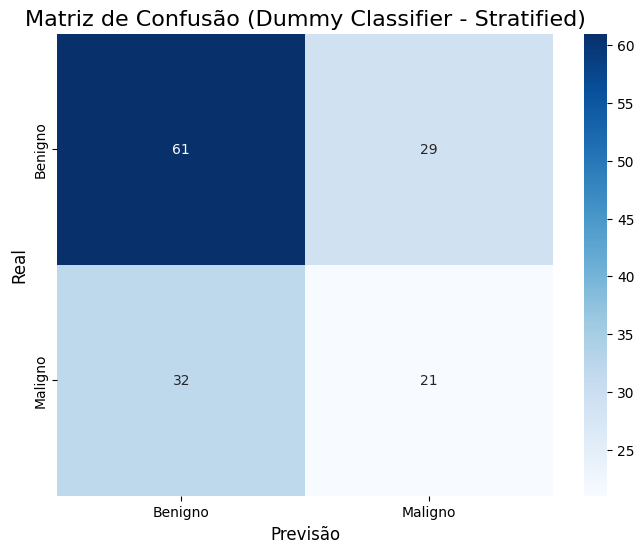


=== AUC (Area Under the ROC Curve) (Dummy Classifier - Stratified) ===
AUC: 0.5370


In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Instantiate a DummyClassifier model
dummy_model = DummyClassifier(strategy="stratified", random_state=42)

# 2. Train the Dummy Classifier model
dummy_model.fit(X_train_scaled, y_train_num)

# 3. Make predictions on the scaled test data
y_pred_dummy_num = dummy_model.predict(X_test_scaled)

# 4. Calculate predicted probabilities for the positive class (if available)
y_pred_dummy_proba = None
if hasattr(dummy_model, "predict_proba"):
    y_pred_dummy_proba = dummy_model.predict_proba(X_test_scaled)[:, 1]


# 5. Print the classification report
print("=== Relatório de Classificação (Dummy Classifier - Stratified) ===")
print(classification_report(y_test_num, y_pred_dummy_num, target_names=['Benigno', 'Maligno'], zero_division=0))

# 6. Calculate the confusion matrix
cm_dummy = confusion_matrix(y_test_num, y_pred_dummy_num)

# 7. Print the confusion matrix
print("\n=== Matriz de Confusão (Dummy Classifier - Stratified) ===")
print(cm_dummy)

# 8. Generate and visualize the Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dummy, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.title('Matriz de Confusão (Dummy Classifier - Stratified)', fontsize=16)
plt.xlabel('Previsão', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.show()

# 9. Calculate and print the AUC (if probabilities were calculated)
if y_pred_dummy_proba is not None:
    auc_dummy = roc_auc_score(y_test_num, y_pred_dummy_proba)
    print(f"\n=== AUC (Area Under the ROC Curve) (Dummy Classifier - Stratified) ===")
    print(f"AUC: {auc_dummy:.4f}")

## Perceptron


=== Relatório de Classificação (Perceptron) ===
              precision    recall  f1-score   support

     Benigno       0.97      1.00      0.98        90
     Maligno       1.00      0.94      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143


=== Matriz de Confusão (Perceptron) ===
[[90  0]
 [ 3 50]]


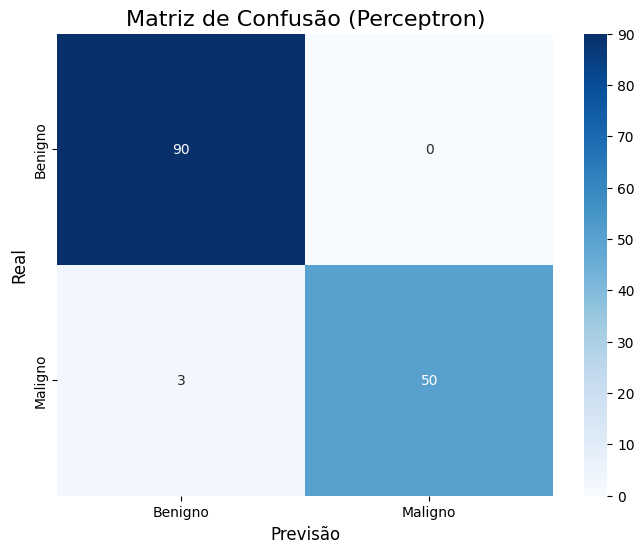

In [43]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Instanciar o modelo Perceptron
perceptron_model = Perceptron(random_state=42)

# 2. Treinar o modelo Perceptron
perceptron_model.fit(X_train_scaled, y_train_num)

# 3. Realizar previsões nos dados de teste escalonados
y_pred_perceptron_num = perceptron_model.predict(X_test_scaled)

# 4. Imprimir o relatório de classificação
print("=== Relatório de Classificação (Perceptron) ===")
print(classification_report(y_test_num, y_pred_perceptron_num, target_names=['Benigno', 'Maligno']))

# 5. Calcular a matriz de confusão
cm_perceptron = confusion_matrix(y_test_num, y_pred_perceptron_num)

# 6. Imprimir a matriz de confusão
print("\n=== Matriz de Confusão (Perceptron) ===")
print(cm_perceptron)

# 7. Gerar e visualizar a Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_perceptron, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.title('Matriz de Confusão (Perceptron)', fontsize=16)
plt.xlabel('Previsão', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.show()

## Random Forest

=== Relatório de Classificação (Random Forest) ===
              precision    recall  f1-score   support

     Benigno       0.95      1.00      0.97        90
     Maligno       1.00      0.91      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143


=== Matriz de Confusão (Random Forest) ===
[[90  0]
 [ 5 48]]


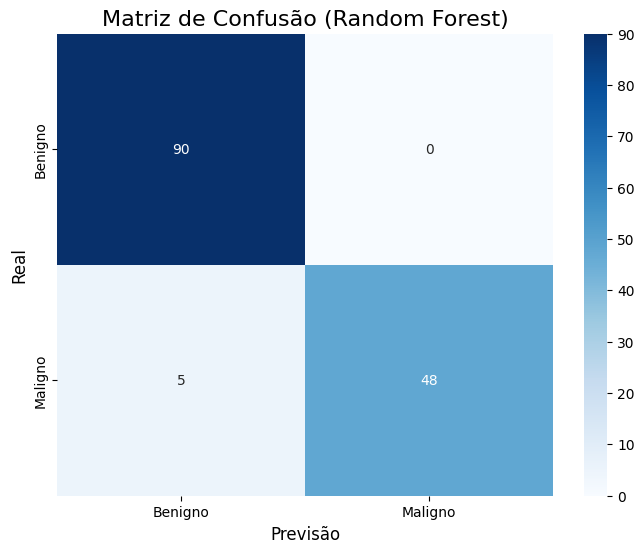


=== AUC (Area Under the ROC Curve) (Random Forest) ===
AUC: 0.9945


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Instantiate a RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# 2. Train the Random Forest model
rf_model.fit(X_train_scaled, y_train_num)

# 3. Make predictions on the scaled test data
y_pred_rf_num = rf_model.predict(X_test_scaled)

# 4. Calculate predicted probabilities for the positive class
y_pred_rf_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# 5. Print the classification report
print("=== Relatório de Classificação (Random Forest) ===")
print(classification_report(y_test_num, y_pred_rf_num, target_names=['Benigno', 'Maligno']))

# 6. Calculate the confusion matrix
cm_rf = confusion_matrix(y_test_num, y_pred_rf_num)

# 7. Print the confusion matrix
print("\n=== Matriz de Confusão (Random Forest) ===")
print(cm_rf)

# 8. Generate and visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.title('Matriz de Confusão (Random Forest)', fontsize=16)
plt.xlabel('Previsão', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.show()

# 9. Calculate and print the AUC
auc_rf = roc_auc_score(y_test_num, y_pred_rf_proba)
print(f"\n=== AUC (Area Under the ROC Curve) (Random Forest) ===")
print(f"AUC: {auc_rf:.4f}")

## K-neighbors classifier

=== Relatório de Classificação (K-Neighbors Classifier) ===
              precision    recall  f1-score   support

     Benigno       0.95      0.99      0.97        90
     Maligno       0.98      0.91      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143


=== Matriz de Confusão (K-Neighbors Classifier) ===
[[89  1]
 [ 5 48]]


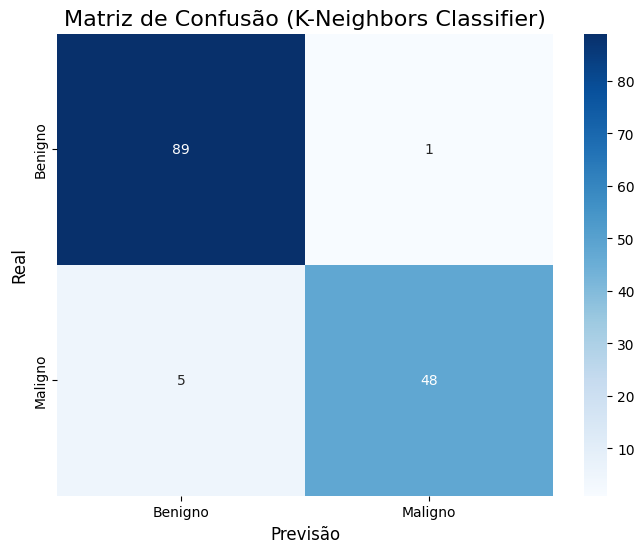


=== AUC (Area Under the ROC Curve) (K-Neighbors Classifier) ===
AUC: 0.9860


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Instanciar o modelo K-Neighbors Classifier
# KNeighborsClassifier não suporta random_state diretamente no construtor para este fim.
knn_model = KNeighborsClassifier()

# 2. Treinar o modelo K-Neighbors Classifier
knn_model.fit(X_train_scaled, y_train_num)

# 3. Realizar previsões nos dados de teste escalonados
y_pred_knn_num = knn_model.predict(X_test_scaled)

# 4. Calcular probabilidades para a classe positiva
y_pred_knn_proba = knn_model.predict_proba(X_test_scaled)[:, 1]

# 5. Imprimir o relatório de classificação
print("=== Relatório de Classificação (K-Neighbors Classifier) ===")
print(classification_report(y_test_num, y_pred_knn_num, target_names=['Benigno', 'Maligno']))

# 6. Calcular a matriz de confusão
cm_knn = confusion_matrix(y_test_num, y_pred_knn_num)

# 7. Imprimir a matriz de confusão
print("\n=== Matriz de Confusão (K-Neighbors Classifier) ===")
print(cm_knn)

# 8. Gerar e visualizar a Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.title('Matriz de Confusão (K-Neighbors Classifier)', fontsize=16)
plt.xlabel('Previsão', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.show()

# 9. Calcular e imprimir a AUC
auc_knn = roc_auc_score(y_test_num, y_pred_knn_proba)
print(f"\n=== AUC (Area Under the ROC Curve) (K-Neighbors Classifier) ===")
print(f"AUC: {auc_knn:.4f}")

## Regressão logística

=== Relatório de Classificação ===
              precision    recall  f1-score   support

     Benigno       0.96      0.99      0.97        90
     Maligno       0.98      0.92      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143


=== Matriz de Confusão ===
[[89  1]
 [ 4 49]]


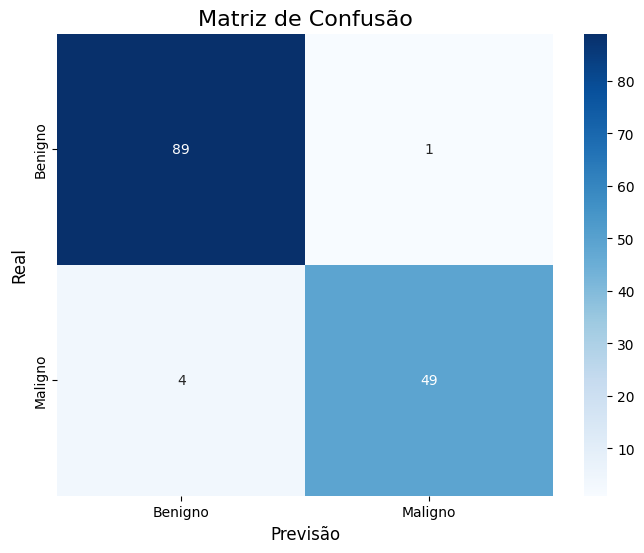


=== AUC (Area Under the ROC Curve) ===
AUC: 0.9962


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# 4. Escalonar APENAS as features (X) usando StandardScaler
#    É crucial ajustar o scaler SOMENTE nos dados de treino para evitar vazamento de dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Aplicar a mesma transformação nos dados de teste

# 5. Instanciar e treinar o modelo de Regressão Logística
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train_num)

# 6. Realizar previsões nos dados de teste escalonados
y_pred_num = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] # Probabilidades para a classe positiva (Maligno)

# 7. Avaliar o modelo
print("=== Relatório de Classificação ===")
print(classification_report(y_test_num, y_pred_num, target_names=['Benigno', 'Maligno']))

print("\n=== Matriz de Confusão ===")
cm = confusion_matrix(y_test_num, y_pred_num)
print(cm)

# Visualizar a Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.title('Matriz de Confusão', fontsize=16)
plt.xlabel('Previsão', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.show()


# Calcular e imprimir a AUC
auc = roc_auc_score(y_test_num, y_pred_proba)
print(f"\n=== AUC (Area Under the ROC Curve) ===")
print(f"AUC: {auc:.4f}")

## Comparar resultados

Comparação das métricas de avaliação (Acurácia, Precisão, Recall, F1-Score e AUC) obtidas para cada um dos modelos avaliados individualmente, apresentando um resumo comparativo.

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

model_comparison = {
    "Regressão Logística": {
        "Acurácia": accuracy_score(y_test_num, model.predict(X_test_scaled)),
        "Precisão": precision_score(y_test_num, model.predict(X_test_scaled)),
        "Recall": recall_score(y_test_num, model.predict(X_test_scaled)),
        "F1-Score": f1_score(y_test_num, model.predict(X_test_scaled)),
        "AUC": roc_auc_score(y_test_num, model.predict_proba(X_test_scaled)[:, 1])
    },
    "Perceptron": {
        "Acurácia": accuracy_score(y_test_num, y_pred_perceptron_num),
        "Precisão": precision_score(y_test_num, y_pred_perceptron_num),
        "Recall": recall_score(y_test_num, y_pred_perceptron_num),
        "F1-Score": f1_score(y_test_num, y_pred_perceptron_num),
        "AUC": "N/A" # Perceptron does not have predict_proba for AUC
    },
    "Random Forest": {
        "Acurácia": accuracy_score(y_test_num, y_pred_rf_num),
        "Precisão": precision_score(y_test_num, y_pred_rf_num),
        "Recall": recall_score(y_test_num, y_pred_rf_num),
        "F1-Score": f1_score(y_test_num, y_pred_rf_num),
        "AUC": roc_auc_score(y_test_num, y_pred_rf_proba)
    },
    "Dummy Classifier (Estratificado)": {
        "Acurácia": accuracy_score(y_test_num, y_pred_dummy_num),
        "Precisão": precision_score(y_test_num, y_pred_dummy_num, zero_division=0),
        "Recall": recall_score(y_test_num, y_pred_dummy_num, zero_division=0),
        "F1-Score": f1_score(y_test_num, y_pred_dummy_num, zero_division=0),
        "AUC": auc_dummy # AUC was calculated for Dummy Classifier
    },
     "K-Neighbors Classifier": {
        "Acurácia": accuracy_score(y_test_num, y_pred_knn_num),
        "Precisão": precision_score(y_test_num, y_pred_knn_num),
        "Recall": recall_score(y_test_num, y_pred_knn_num),
        "F1-Score": f1_score(y_test_num, y_pred_knn_num),
        "AUC": roc_auc_score(y_test_num, y_pred_knn_proba)
    }
}


model_comparison_df = pd.DataFrame(model_comparison).T
print("=== Resumo Comparativo das Métricas de Avaliação dos Modelos ===")
display(model_comparison_df)

=== Resumo Comparativo das Métricas de Avaliação dos Modelos ===


,Acurácia,Precisão,Recall,F1-Score,AUC
Regressão Logística,0.965035,0.98,0.924528,0.951456,0.996226
Perceptron,0.979021,1.0,0.943396,0.970874,N/A
Random Forest,0.965035,1.0,0.90566,0.950495,0.994549
Dummy Classifier (Estratificado),0.573427,0.42,0.396226,0.407767,0.537002
K-Neighbors Classifier,0.958042,0.979592,0.90566,0.941176,0.985954


## Avaliação da Regressão Logística com Validação Cruzada K-Fold

Validação cruzada K-Fold para o modelo de Regressão Logística e comparação das métricas com a avaliação obtida a partir de uma única divisão treino/teste.

In [50]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

# Número de folds para a validação cruzada
n_splits = 5

# Inicializar o StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Listas para armazenar as métricas de cada fold para a Regressão Logística
lr_fold_accuracy = []
lr_fold_precision = []
lr_fold_recall = []
lr_fold_f1 = []
lr_fold_auc = []

# Instanciar o modelo de Regressão Logística
lr_model = LogisticRegression(random_state=42)

print(f"Avaliando modelo: Regressão Logística com {n_splits}-Fold Cross-Validation")

# Iterar sobre os folds
for fold, (train_index, test_index) in enumerate(skf.split(X, y_num)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold_num, y_test_fold_num = y_num.iloc[train_index], y_num.iloc[test_index]

    # Escalonar os dados DENTRO do loop do fold
    scaler_fold = StandardScaler()
    X_train_fold_scaled = scaler_fold.fit_transform(X_train_fold)
    X_test_fold_scaled = scaler_fold.transform(X_test_fold)

    # Treinar o modelo no fold de treino escalonado
    lr_model.fit(X_train_fold_scaled, y_train_fold_num)

    # Fazer previsões no fold de teste escalonado
    y_pred_fold_num = lr_model.predict(X_test_fold_scaled)
    y_pred_fold_proba = lr_model.predict_proba(X_test_fold_scaled)[:, 1]

    # Calcular métricas para o fold atual
    acc = accuracy_score(y_test_fold_num, y_pred_fold_num)
    prec = precision_score(y_test_fold_num, y_pred_fold_num, zero_division=0)
    rec = recall_score(y_test_fold_num, y_pred_fold_num, zero_division=0)
    f1 = f1_score(y_test_fold_num, y_pred_fold_num, zero_division=0)
    auc_score = roc_auc_score(y_test_fold_num, y_pred_fold_proba)

    # Armazenar as métricas do fold
    lr_fold_accuracy.append(acc)
    lr_fold_precision.append(prec)
    lr_fold_recall.append(rec)
    lr_fold_f1.append(f1)
    lr_fold_auc.append(auc_score)

    print(f"  Fold {fold + 1}: Acc={acc:.4f}, Prec={prec:.4f}, Rec={rec:.4f}, F1={f1:.4f}, AUC={auc_score:.4f}")

# Calcular as métricas médias e desvio padrão da validação cruzada
lr_mean_accuracy = np.mean(lr_fold_accuracy)
lr_std_accuracy = np.std(lr_fold_accuracy)
lr_mean_precision = np.mean(lr_fold_precision)
lr_std_precision = np.std(lr_fold_precision)
lr_mean_recall = np.mean(lr_fold_recall)
lr_std_recall = np.std(lr_fold_recall)
lr_mean_f1 = np.mean(lr_fold_f1)
lr_std_f1 = np.std(lr_fold_f1)
lr_mean_auc = np.mean(lr_fold_auc)
lr_std_auc = np.std(lr_fold_auc)


print("\n=== Métricas Médias (Validação Cruzada) ===")
print(f"  Acurácia: {lr_mean_accuracy:.4f} ± {lr_std_accuracy:.4f}")
print(f"  Precisão: {lr_mean_precision:.4f} ± {lr_std_precision:.4f}")
print(f"  Recall: {lr_mean_recall:.4f} ± {lr_std_recall:.4f}")
print(f"  F1-Score: {lr_mean_f1:.4f} ± {lr_std_f1:.4f}")
print(f"  AUC: {lr_mean_auc:.4f} ± {lr_std_auc:.4f}")

# Obter as métricas da avaliação com uma única divisão (assumindo que 'model_comparison' DataFrame está disponível)
# Certifique-se de que o DataFrame model_comparison_df foi gerado na célula 17b754a9
if 'model_comparison_df' in globals():
    single_split_metrics = model_comparison_df.loc['Regressão Logística']

    print("\n=== Comparação: Validação Cruzada vs. Única Divisão ===")
    comparison_data = {
        "Métrica": ["Acurácia", "Precisão", "Recall", "F1-Score", "AUC"],
        "Validação Cruzada (Média ± Std)": [
            f"{lr_mean_accuracy:.4f} ± {lr_std_accuracy:.4f}",
            f"{lr_mean_precision:.4f} ± {lr_std_precision:.4f}",
            f"{lr_mean_recall:.4f} ± {lr_std_recall:.4f}",
            f"{lr_mean_f1:.4f} ± {lr_std_f1:.4f}",
            f"{lr_mean_auc:.4f} ± {lr_std_auc:.4f}"
        ],
        "Única Divisão": [
            f"{single_split_metrics['Acurácia']:.4f}",
            f"{single_split_metrics['Precisão']:.4f}",
            f"{single_split_metrics['Recall']:.4f}",
            f"{single_split_metrics['F1-Score']:.4f}",
            f"{single_split_metrics['AUC']:.4f}" # Assuming AUC is numeric in single_split_metrics
        ]
    }
    comparison_df = pd.DataFrame(comparison_data)
    display(comparison_df)
else:
    print("\nDataFrame 'model_comparison_df' não encontrado. Execute a célula de comparação de resultados (17b754a9) primeiro para ver a comparação.")

Avaliando modelo: Regressão Logística com 5-Fold Cross-Validation
  Fold 1: Acc=0.9737, Prec=0.9545, Rec=0.9767, F1=0.9655, AUC=0.9951
  Fold 2: Acc=0.9474, Prec=1.0000, Rec=0.8605, F1=0.9250, AUC=0.9977
  Fold 3: Acc=0.9649, Prec=1.0000, Rec=0.9048, F1=0.9500, AUC=0.9851
  Fold 4: Acc=0.9912, Prec=0.9767, Rec=1.0000, F1=0.9882, AUC=1.0000
  Fold 5: Acc=0.9912, Prec=1.0000, Rec=0.9762, F1=0.9880, AUC=0.9987

=== Métricas Médias (Validação Cruzada) ===
  Acurácia: 0.9737 ± 0.0166
  Precisão: 0.9863 ± 0.0182
  Recall: 0.9436 ± 0.0525
  F1-Score: 0.9633 ± 0.0240
  AUC: 0.9953 ± 0.0053

=== Comparação: Validação Cruzada vs. Única Divisão ===


,Métrica,Validação Cruzada (Média ± Std),Única Divisão
0,Acurácia,0.9737 ± 0.0166,0.9650
1,Precisão,0.9863 ± 0.0182,0.9800
2,Recall,0.9436 ± 0.0525,0.9245
3,F1-Score,0.9633 ± 0.0240,0.9515
4,AUC,0.9953 ± 0.0053,0.9962


##Conferir de executamos todas as etapas:
Tarefa

Cada aluno deverá escolher um dataset de sua preferência (ex.: Kaggle, UCI Machine Learning Repository, IBGE, dados sintéticos gerados com IA, entre outros) e desenvolver um projeto de Machine Learning, contendo as seguintes etapas:

Descrição do problema a ser resolvido (ex.: previsão, classificação, agrupamento).

Pré-processamento dos dados: tratamento de valores ausentes, normalização/transformação, codificação de variáveis, análise exploratória.

Definição da tarefa de aprendizado: supervisionado ou não supervisionado.

Construção do modelo: escolha de algoritmos adequados (regressão, classificação, clusterização, etc.).

Avaliação do modelo: utilização de métricas apropriadas ao problema.

Aplicação de boas práticas conforme a necessidade:

- Evitar overfitting

- Validação adequada

- Regularização, quando necessário

- Tratamento de classes desbalanceadas

- Evitar vazamento de informações

---


## Support Vector Classifier (SVC)

In [55]:
# --- ETAPA 1 e 2 (Resumida): Carregamento e Limpeza ---
print("--- Iniciando o processo: Carregamento e Limpeza ---")
try:
    file_path = "data.csv"

    # Load the latest version
    dt = kagglehub.dataset_load(
      KaggleDatasetAdapter.PANDAS,
      "uciml/breast-cancer-wisconsin-data",
      file_path,
      # Provide any additional arguments like
      # sql_query or pandas_kwargs. See the
      # documenation for more information:
      # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
    )

    if 'id' in dt.columns: dt = dt.drop(columns=['id'])
    if 'Unnamed: 32' in dt.columns: dt = dt.drop(columns=['Unnamed: 32'])
    print("Dataset 'data.csv' carregado e limpo com sucesso.\n")
except FileNotFoundError:
    print("Erro: Arquivo 'data.csv' não encontrado. ")
    os.exit(1)

--- Iniciando o processo: Carregamento e Limpeza ---
Using Colab cache for faster access to the 'breast-cancer-wisconsin-data' dataset.
Dataset 'data.csv' carregado e limpo com sucesso.



--- Etapa de Pré-processing ---
Dados divididos em conjuntos de treino e teste (80%/20%).

--- Treinando e Avaliando: SVM (Linear) ---
Relatório de Classificação (Linear):
              precision    recall  f1-score   support

 Benigno (B)       0.95      1.00      0.97        72
 Maligno (M)       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

AUC (Area Under the Curve): 0.9914

Matriz de Confusão - SVM (Linear):


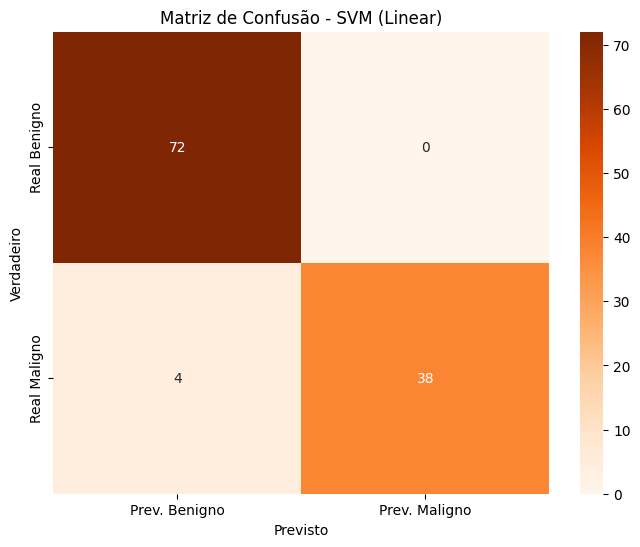

------------------------------------------------------------
--- Treinando e Avaliando: SVM (RBF) ---
Relatório de Classificação (RBF):
              precision    recall  f1-score   support

 Benigno (B)       0.99      0.99      0.99        72
 Maligno (M)       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

AUC (Area Under the Curve): 0.9954

Matriz de Confusão - SVM (RBF):


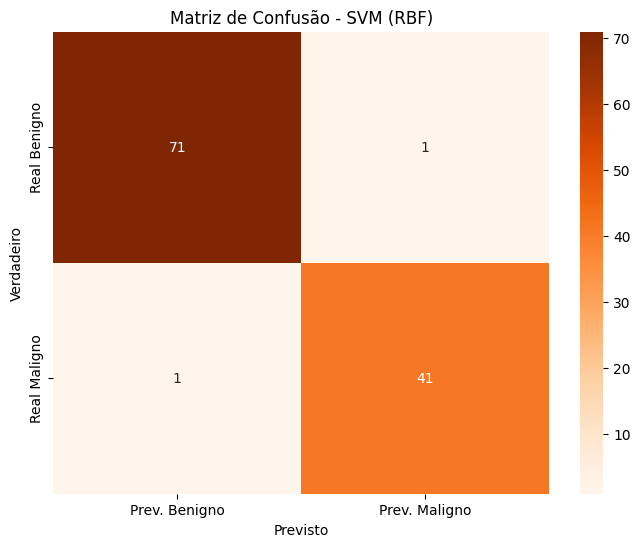

------------------------------------------------------------


In [56]:
# --- Bloco de Código Completo: Pipelines para Support Vector Classifier (SVC) ---



# --- ETAPA 3: Pré-processamento e Divisão dos Dados ---
print("--- Etapa de Pré-processing ---")
X = dt.drop(columns=['diagnosis'])
y = dt['diagnosis'].map({'M': 1, 'B': 0})
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Dados divididos em conjuntos de treino e teste (80%/20%).\n")

# --- ETAPA 6: Modelagem, Treinamento e Avaliação com SVM ---

# 6.1: Definir os Pipelines para SVC Linear e SVC RBF
pipeline_svc_linear = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel='linear', random_state=42, probability=True))
])

pipeline_svc_rbf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel='rbf', random_state=42, probability=True, class_weight='balanced'))
])

# Treinamento e avaliação para SVM Linear
print("--- Treinando e Avaliando: SVM (Linear) ---")
pipeline_svc_linear.fit(X_train, y_train)
y_pred_linear = pipeline_svc_linear.predict(X_test)
y_proba_linear = pipeline_svc_linear.predict_proba(X_test)[:, 1]
report_svc_linear = classification_report(y_test, y_pred_linear, target_names=['Benigno (B)', 'Maligno (M)'])
auc_linear = roc_auc_score(y_test, y_proba_linear)
print("Relatório de Classificação (Linear):")
print(report_svc_linear)
print(f"AUC (Area Under the Curve): {auc_linear:.4f}\n")
print(f"Matriz de Confusão - SVM (Linear):")
cm_linear = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Prev. Benigno', 'Prev. Maligno'],
            yticklabels=['Real Benigno', 'Real Maligno'])
plt.title('Matriz de Confusão - SVM (Linear)')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()
print("-" * 60)

# Treinamento e avaliação para SVM RBF
print("--- Treinando e Avaliando: SVM (RBF) ---")
pipeline_svc_rbf.fit(X_train, y_train)
y_pred_rbf = pipeline_svc_rbf.predict(X_test)
y_proba_rbf = pipeline_svc_rbf.predict_proba(X_test)[:, 1]
report_svc_rbf = classification_report(y_test, y_pred_rbf, target_names=['Benigno (B)', 'Maligno (M)'])
auc_rbf = roc_auc_score(y_test, y_proba_rbf)
print("Relatório de Classificação (RBF):")
print(report_svc_rbf)
print(f"AUC (Area Under the Curve): {auc_rbf:.4f}\n")
print(f"Matriz de Confusão - SVM (RBF):")
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Prev. Benigno', 'Prev. Maligno'],
            yticklabels=['Real Benigno', 'Real Maligno'])
plt.title('Matriz de Confusão - SVM (RBF)')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()
print("-" * 60)



#### Interpretação dos Modelos SVM

1. **SVM com Kernel Linear**

O modelo SVM Linear apresentou desempenho robusto, com 96% de acurácia e comportamento altamente confiável nas previsões positivas. A precisão perfeita (100%) para a classe maligna é um destaque absoluto, indicando que o modelo não gerou nenhum alarme falso. No entanto, essa cautela resultou em um recall de 90%, com 4 falsos negativos — uma limitação relevante em contextos médicos.

**Matriz de Confusão**

|                   | Predito Maligno | Predito Benigno |
|-------------------|------------------|------------------|
| Real Maligno      | 38 (VP)          | 4 (FN)           |
| Real Benigno      | 0 (FP)           | 72 (VN)          |

**Métricas de Classificação**

| Métrica           | Valor  | Interpretação |
|-------------------|--------|----------------|
| Acurácia          | 96%    | Excelente desempenho geral. |
| Precisão (Maligno)| 100%   | Nenhum alarme falso. Altíssima confiança nas previsões positivas. |
| Recall (Maligno)  | 90%    | Sensibilidade sólida, mas inferior ao modelo RBF. |
| AUC               | 0.9914 | Poder de discriminação muito alto. |

**Observações Estratégicas**

- A fronteira de decisão linear é eficaz, mas limitada na captura de padrões mais complexos.
- O desempenho é estatisticamente equivalente ao da Regressão Logística, sugerindo que os dados são, em grande parte, linearmente separáveis.
- A ausência de falsos positivos é ideal para evitar alarmes desnecessários, mas o custo é a perda de sensibilidade.



2. **SVM com Kernel RBF (Radial Basis Function)**

Com 98% de acurácia e AUC de 0.9954, ele demonstra capacidade excepcional de discriminação e adaptação à complexidade dos dados. A fronteira de decisão não-linear foi decisiva para capturar padrões que escapam aos modelos lineares.

**Matriz de Confusão**

|                   | Predito Maligno | Predito Benigno |
|-------------------|------------------|------------------|
| Real Maligno      | 41 (VP)          | 1 (FN)           |
| Real Benigno      | 1 (FP)           | 71 (VN)          |

**Métricas de Classificação**

| Métrica           | Valor  | Interpretação |
|-------------------|--------|----------------|
| Acurácia          | 98%    | Desempenho superior ao modelo linear. |
| Precisão (Maligno)| 98%    | Altíssima confiança nas previsões positivas. |
| Recall (Maligno)  | 98%    | Sensibilidade quase perfeita. |
| AUC               | 0.9954 | Poder de discriminação excepcional. |

**Observações**

- A capacidade do kernel RBF de modelar fronteiras complexas foi validada pelas hipóteses levantadas na EDA com t-SNE.
- O modelo equilibra precisão e recall de forma exemplar, tornando-se o mais indicado para aplicações médicas.
- A redução drástica nos falsos negativos é o principal diferencial, com impacto direto na segurança do diagnóstico.



3. **Conclusão Comparativa**

| Modelo         | Acurácia | Precisão (Maligno) | Recall (Maligno) | Falsos Negativos | AUC     |
|----------------|----------|---------------------|-------------------|------------------|---------|
| SVM Linear     | 96%      | 100%                | 90%               | 4                | 0.9914  |
| SVM com RBF    | 98%      | 98%                 | 98%               | 1                | 0.9954  |

- O SVM com kernel RBF é o modelo mais eficaz para este problema, especialmente por sua capacidade de minimizar falsos negativos.
- O SVM Linear, embora confiável, é menos sensível e pode deixar casos críticos sem diagnóstico.
- Ambos os modelos confirmam que a separação entre classes é bem definida, mas a complexidade da fronteira exige abordagens não-lineares para desempenho ideal.


**Pipeline Híbrido para SVM (RBF)**

--- Etapa de Pré-processing ---
Features selecionadas para o modelo: 10 colunas.
Dados divididos em conjuntos de treino e teste (80%/20%).

--- Treinando e Avaliando: SVM (Linear) ---
Relatório de Classificação (Linear):
              precision    recall  f1-score   support

 Benigno (B)       0.96      1.00      0.98        72
 Maligno (M)       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

AUC (Area Under the Curve): 0.9987

Matriz de Confusão - SVM (Linear):


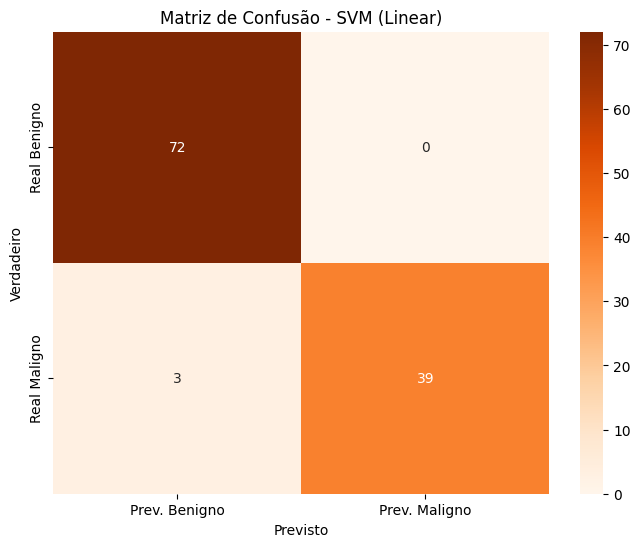

------------------------------------------------------------
--- Treinando e Avaliando: SVM (RBF) ---
Relatório de Classificação (RBF):
              precision    recall  f1-score   support

 Benigno (B)       0.95      1.00      0.97        72
 Maligno (M)       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

AUC (Area Under the Curve): 0.9980

Matriz de Confusão - SVM (RBF):


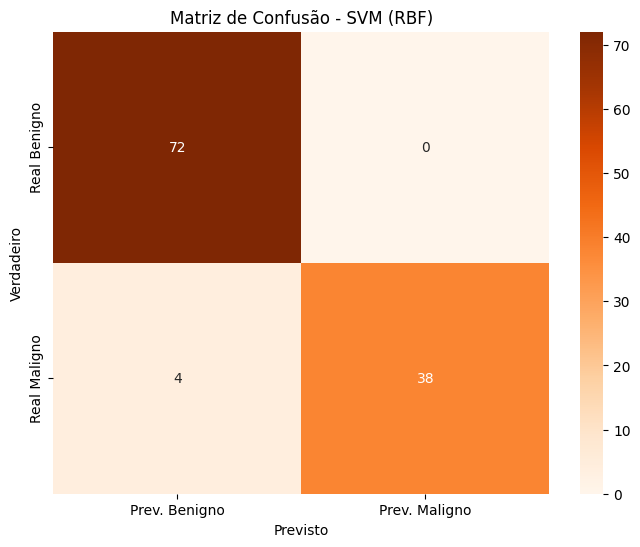

------------------------------------------------------------


In [58]:
# --- Bloco de Código Completo: Pipeline Híbrido para SVM (RBF) ---


# --- ETAPA  Pré-processamento e Divisão dos Dados ---
print("--- Etapa de Pré-processing ---")

#  Separar features (X) e alvo (y), e codificar o alvo
X = dt.drop(columns=['diagnosis'])
y = dt['diagnosis'].map({'M': 1, 'B': 0})

#  Definir a lista das features selecionadas
features_selecionadas = [
    'concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst',
    'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean',
    'concavity_worst'
]
X_selected = X[features_selecionadas]
print(f"Features selecionadas para o modelo: {len(features_selecionadas)} colunas.")

# Dividir os dados selecionados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print("Dados divididos em conjuntos de treino e teste (80%/20%).\n")

# Treinamento e avaliação para SVM Linear
print("--- Treinando e Avaliando: SVM (Linear) ---")
pipeline_svc_linear.fit(X_train, y_train)
y_pred_linear = pipeline_svc_linear.predict(X_test)
y_proba_linear = pipeline_svc_linear.predict_proba(X_test)[:, 1]
report_pcaSeleca_svc_linear = classification_report(y_test, y_pred_linear, target_names=['Benigno (B)', 'Maligno (M)'])
auc_linear = roc_auc_score(y_test, y_proba_linear)
print("Relatório de Classificação (Linear):")
print(report_pcaSeleca_svc_linear)
print(f"AUC (Area Under the Curve): {auc_linear:.4f}\n")
print("Matriz de Confusão - SVM (Linear):")
cm_linear = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Prev. Benigno', 'Prev. Maligno'],
            yticklabels=['Real Benigno', 'Real Maligno'])
plt.title('Matriz de Confusão - SVM (Linear)')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()
print("-" * 60)

# Treinamento e avaliação para SVM RBF
print("--- Treinando e Avaliando: SVM (RBF) ---")
pipeline_svc_rbf.fit(X_train, y_train)
y_pred_rbf = pipeline_svc_rbf.predict(X_test)
y_proba_rbf = pipeline_svc_rbf.predict_proba(X_test)[:, 1]
report_pcaSeleca_svc_rbf = classification_report(y_test, y_pred_rbf, target_names=['Benigno (B)', 'Maligno (M)'])
auc_rbf = roc_auc_score(y_test, y_proba_rbf)
print("Relatório de Classificação (RBF):")
print(report_pcaSeleca_svc_rbf)
print(f"AUC (Area Under the Curve): {auc_rbf:.4f}\n")
print("Matriz de Confusão - SVM (RBF):")
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Prev. Benigno', 'Prev. Maligno'],
            yticklabels=['Real Benigno', 'Real Maligno'])
plt.title('Matriz de Confusão - SVM (RBF)')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()
print("-" * 60)




#### Interpretação dos Modelos SVM Híbridos (Seleção + PCA)

 1. **SVM Linear Híbrido**

O modelo SVM Linear Híbrido apresentou desempenho excepcional, com 97% de acurácia e AUC de 0.9987 — o maior valor entre todos os modelos testados. Ele alcançou precisão perfeita (100%) para a classe maligna e conseguiu reduzir os falsos negativos para apenas 3, igualando o melhor resultado obtido pela Regressão Logística com 30 features, mas com uma estrutura de modelo muito mais simples.

Matriz de Confusão

|                   | Predito Maligno | Predito Benigno |
|-------------------|------------------|------------------|
| Real Maligno      | 39 (VP)          | 3 (FN)           |
| Real Benigno      | 0 (FP)           | 72 (VN)          |

Métricas de Classificação

| Métrica           | Valor  | Interpretação |
|-------------------|--------|----------------|
| Acurácia          | 97%    | Desempenho geral muito alto. |
| Precisão (Maligno)| 100%   | Nenhum alarme falso. |
| Recall (Maligno)  | 93%    | Excelente sensibilidade. |
| AUC               | 0.9987 | Poder de discriminação quase perfeito. |

Observações Estratégicas
- O modelo é altamente confiável nas previsões positivas.
- A redução dimensional via PCA preservou a separabilidade das classes.
- A simplicidade do modelo linear, aliada à engenharia de features, resultou em desempenho competitivo com modelos mais complexos.



2. **SVM com Kernel RBF Híbrido**

O modelo SVM RBF Híbrido também apresentou desempenho forte, com 96% de acurácia e AUC de 0.9980. Assim como os demais modelos híbridos, alcançou precisão perfeita para a classe maligna. No entanto, seu recall caiu para 90%, com 4 falsos negativos — inferior ao SVM RBF completo, que teve apenas 1 FN.

**Matriz de Confusão**

|                   | Predito Maligno | Predito Benigno |
|-------------------|------------------|------------------|
| Real Maligno      | 38 (VP)          | 4 (FN)           |
| Real Benigno      | 0 (FP)           | 72 (VN)          |

**Métricas de Classificação**

| Métrica           | Valor  | Interpretação |
|-------------------|--------|----------------|
| Acurácia          | 96%    | Desempenho geral excelente. |
| Precisão (Maligno)| 100%   | Nenhum alarme falso. |
| Recall (Maligno)  | 90%    | Sensibilidade inferior ao modelo RBF completo. |
| AUC               | 0.9980 | Poder de discriminação altíssimo. |

**Observações**

- O modelo é confiável, mas menos sensível que sua versão com todas as features.
- A redução de dimensionalidade pode ter suavizado nuances importantes para o kernel RBF.


##  Gradient Boosting Machines (GBM)

--- Etapa de Pré-processing ---
Dados divididos em conjuntos de treino e teste (80%/20%).

--- Etapa de Modelagem com Pipeline para Gradient Boosting ---
Pipeline para Gradient Boosting Definido.
Treinando o pipeline de Gradient Boosting...
Treinamento concluído.

--- Etapa de Avaliação do Gradient Boosting no Conjunto de Teste ---
Relatório de Classificação - Gradient Boosting:
              precision    recall  f1-score   support

 Benigno (B)       0.95      1.00      0.97        72
 Maligno (M)       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

AUC (Area Under the Curve): 0.9947

Matriz de Confusão - Gradient Boosting:


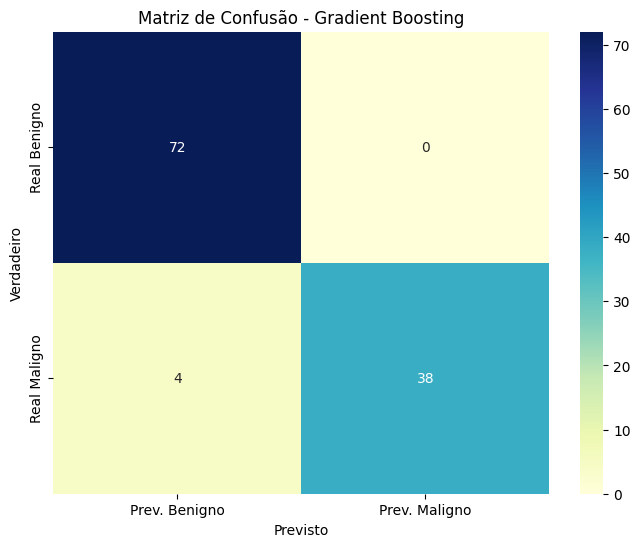

In [59]:


# --- Pré-processamento e Divisão dos Dados ---
print("--- Etapa de Pré-processing ---")
X = dt.drop(columns=['diagnosis'])
y = dt['diagnosis'].map({'M': 1, 'B': 0})
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Dados divididos em conjuntos de treino e teste (80%/20%).\n")


# --- Modelagem, Treinamento e Avaliação com Gradient Boosting ---
print("--- Etapa de Modelagem com Pipeline para Gradient Boosting ---")

# Instanciar o modelo Gradient Boosting dentro de um Pipeline
# Usamos random_state para garantir a reprodutibilidade.
pipeline_gbm = Pipeline([
    ('scaler', StandardScaler()), # Mantido por consistência.
    ('classifier', GradientBoostingClassifier(n_estimators=100, random_state=42))
])
print("Pipeline para Gradient Boosting Definido.")

# Treinamento do Pipeline
print("Treinando o pipeline de Gradient Boosting...")
pipeline_gbm.fit(X_train, y_train)
print("Treinamento concluído.\n")

# Avaliação do Pipeline
print("--- Etapa de Avaliação do Gradient Boosting no Conjunto de Teste ---")
y_pred_gbm = pipeline_gbm.predict(X_test)
y_proba_gbm = pipeline_gbm.predict_proba(X_test)[:, 1]

# Calcular e analisar as métricas
print("Relatório de Classificação - Gradient Boosting:")
reportGradientBoostin = classification_report(y_test, y_pred_gbm, target_names=['Benigno (B)', 'Maligno (M)'])
print(reportGradientBoostin)

auc_gbm = roc_auc_score(y_test, y_proba_gbm)
print(f"AUC (Area Under the Curve): {auc_gbm:.4f}\n")

# Gerar e visualizar a Matriz de Confusão
print("Matriz de Confusão - Gradient Boosting:")
cm_gbm = confusion_matrix(y_test, y_pred_gbm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gbm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Prev. Benigno', 'Prev. Maligno'],
            yticklabels=['Real Benigno', 'Real Maligno'])
plt.title('Matriz de Confusão - Gradient Boosting')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()



#### Análise do Modelo Gradient Boosting

O `GradientBoostingClassifier` apresentou um desempenho de alto nível, combinando **acurácia elevada**, **precisão perfeita** e **excelente poder de discriminação**. No entanto, sua sensibilidade ficou ligeiramente abaixo dos melhores modelos testados, o que merece atenção especial.



1. Desempenho Geral

- **Acurácia:** 96%  
- **AUC:** 0.9947 → Poder de separação entre classes extremamente alto
- **Precisão (Maligno):** 100% → Nenhum alarme falso
- **Recall (Maligno):** 90% → Boa sensibilidade, mas com margem para melhoria



2. Matriz de Confusão

| Classe Real | Predito como Benigno | Predito como Maligno |
|-------------|----------------------|-----------------------|
| Benigno     | 72 (VN)              | 0 (FP)                |
| Maligno     | 4 (FN)               | 38 (VP)               |

**Resumo dos Erros:**

- **Falsos Positivos (0):**  
  O modelo não gerou nenhum alarme falso, o que é ideal para evitar exames desnecessários.

- **Falsos Negativos (4):**  
  Embora o número seja relativamente baixo, esses erros representam tumores não diagnosticados — o tipo de falha mais crítico em contextos médicos.



 3. Relatório de Classificação

| Métrica               | Valor     | Interpretação |
|-----------------------|-----------|----------------|
| **Acurácia**          | 96%       | Alta taxa de acerto geral |
| **Precisão (Maligno)**| 100%      | Toda previsão de malignidade foi correta |
| **Recall (Maligno)**  | 90%       | O modelo identificou 90% dos tumores malignos |
| **AUC**               | 0.9947    | Discriminação quase perfeita entre classes |


**Interpretação Final**

O Gradient Boosting se posiciona como um **classificador altamente confiável**, com:

- **Precisão perfeita** para a classe maligna
- **AUC altíssima**, indicando excelente separação entre classes
- **Sensibilidade sólida, mas não superior**, com 4 tumores malignos não detectados


